# Model Visualisation - Cars

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('dark_background')

In [4]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '24'

In [5]:
# Figure Customization
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['figure.dpi'] = 150

In [6]:
# Save Figure Customization
plt.rcParams['savefig.directory'] = "/images"
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5

In [7]:
# Axes Customization
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['axes3d.grid'] = False

In [8]:
# Line Customization
plt.rcParams['lines.linewidth'] = 3

In [9]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 20.0
plt.rcParams['ytick.major.pad'] = 20.0
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [10]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [11]:
# Marker Customization
plt.rcParams['markers.fillstyle'] = 'none'

In [12]:
# plt.rcParams

In [13]:
# Specify Color
green = "#00FF1C"
yellow = "#FFFF00"
blue = "#0000FF"
red = "#FF0000"
orange = "#FFA500"

## Load the Data

In [14]:
cars = pd.read_csv("data/cars_small.csv")

In [16]:
cars = cars.sort_values(by = 'price')

In [17]:
cars.head(4)

brand      model  price  kmpl  bhp       type
35     Tata       Nano    199  23.9   38  Hatchback
17   Suzuki   Alto 800    248  22.7   47  Hatchback
11  Hyundai        EON    302  21.1   55  Hatchback
26   Nissan  Datsun GO    312  20.6   67  Hatchback

In [18]:
cars.tail(4)

brand  model  price  kmpl  bhp   type
19      Suzuki   Ciaz    725  20.7   91  Sedan
33       Skoda  Rapid    756  15.0  104  Sedan
14     Hyundai  Verna    774  17.4  106  Sedan
41  Volkswagen  Vento    785  16.1  104  Sedan

In [21]:
cars.loc[cars.type == 'Hatchback', 'type'] = 'hatchback'
cars.loc[cars.type == 'Sedan', 'type'] = 'sedan'

In [22]:
cars.loc[cars.type == 'hatchback', 'types'] = 0
cars.loc[cars.type == 'sedan', 'types'] = 1

In [23]:
cars.head()

brand      model  price  kmpl  bhp       type  types
35     Tata       Nano    199  23.9   38  hatchback    0.0
17   Suzuki   Alto 800    248  22.7   47  hatchback    0.0
11  Hyundai        EON    302  21.1   55  hatchback    0.0
26   Nissan  Datsun GO    312  20.6   67  hatchback    0.0
16   Suzuki       Alto    315  24.1   67  hatchback    0.0

In [24]:
cars = cars.sort_values(by ='kmpl')

In [25]:
price = cars['price']
kmpl = cars['kmpl']
types = cars['types']
bhp = cars['bhp']

## [0] Visualise the Data

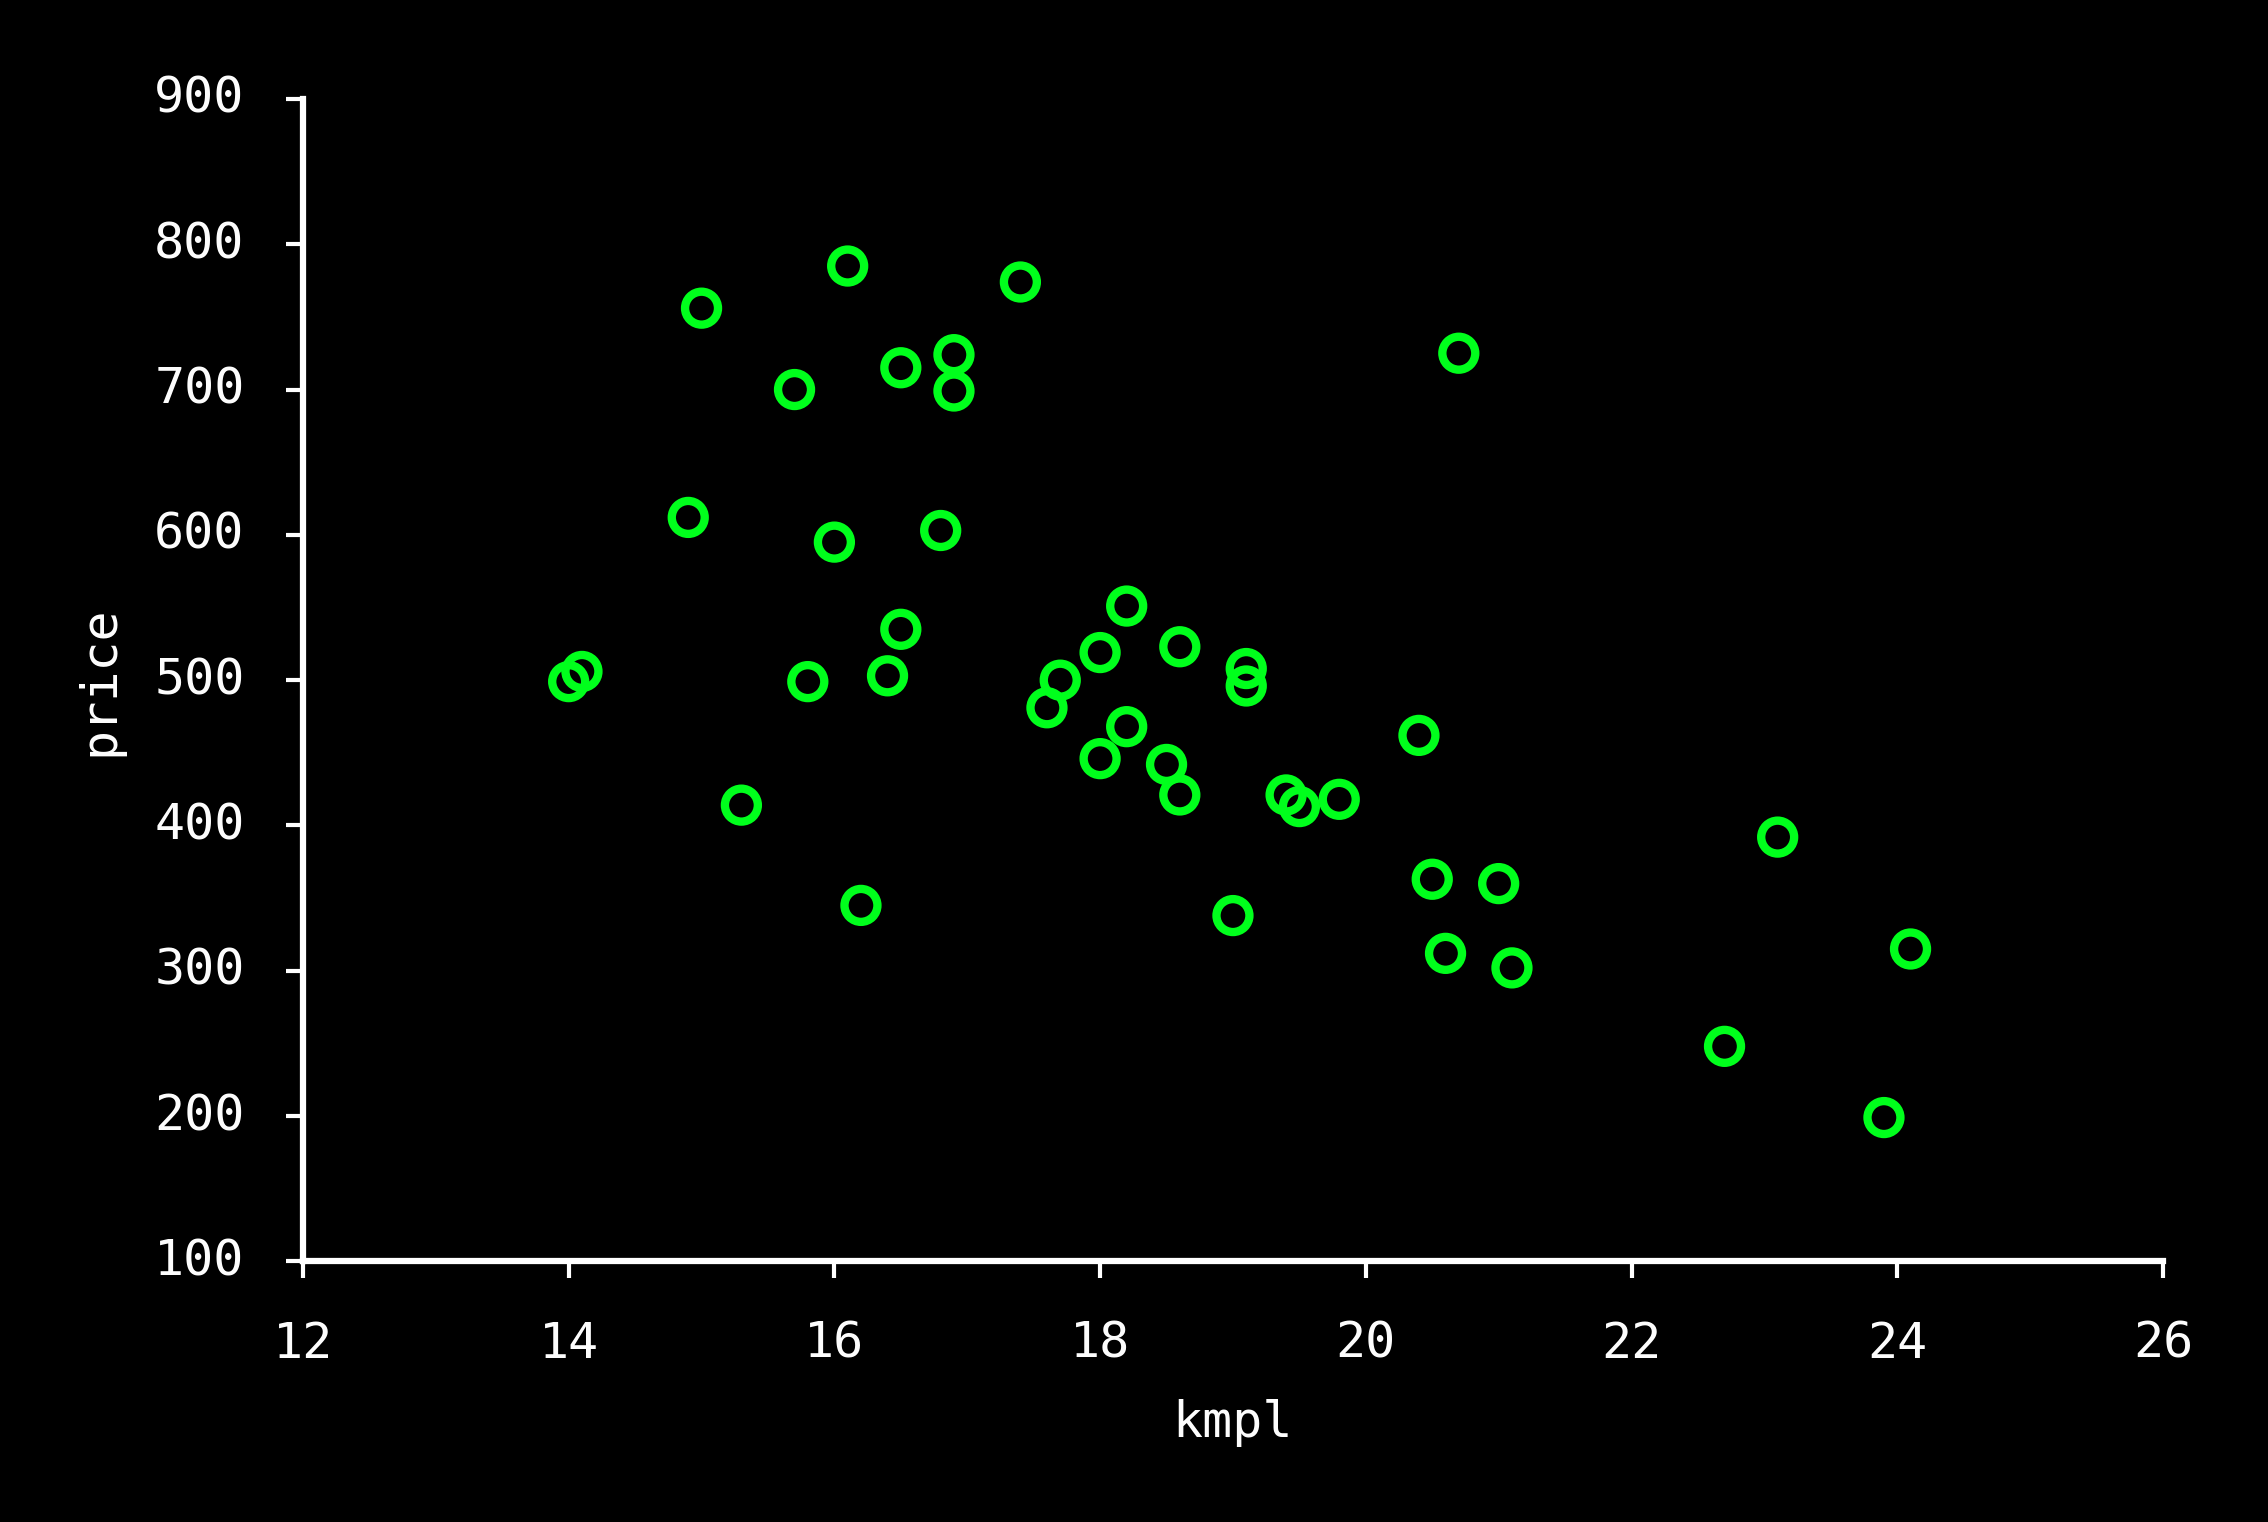

In [26]:
plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_01.png")

## [1] Visualise the Prediction 

### Ordinary Least Square (OLS)

In [27]:
from sklearn import linear_model

In [28]:
# Run OLS
model_ols = linear_model.LinearRegression(normalize = True).fit(kmpl.reshape(-1,1),price)
price_ols = model_ols.predict(kmpl.reshape(-1,1))
beta_0_ols, beta_1_ols = model_ols.intercept_, model_ols.coef_[0]

In [29]:
cars['price_ols'] = price_ols

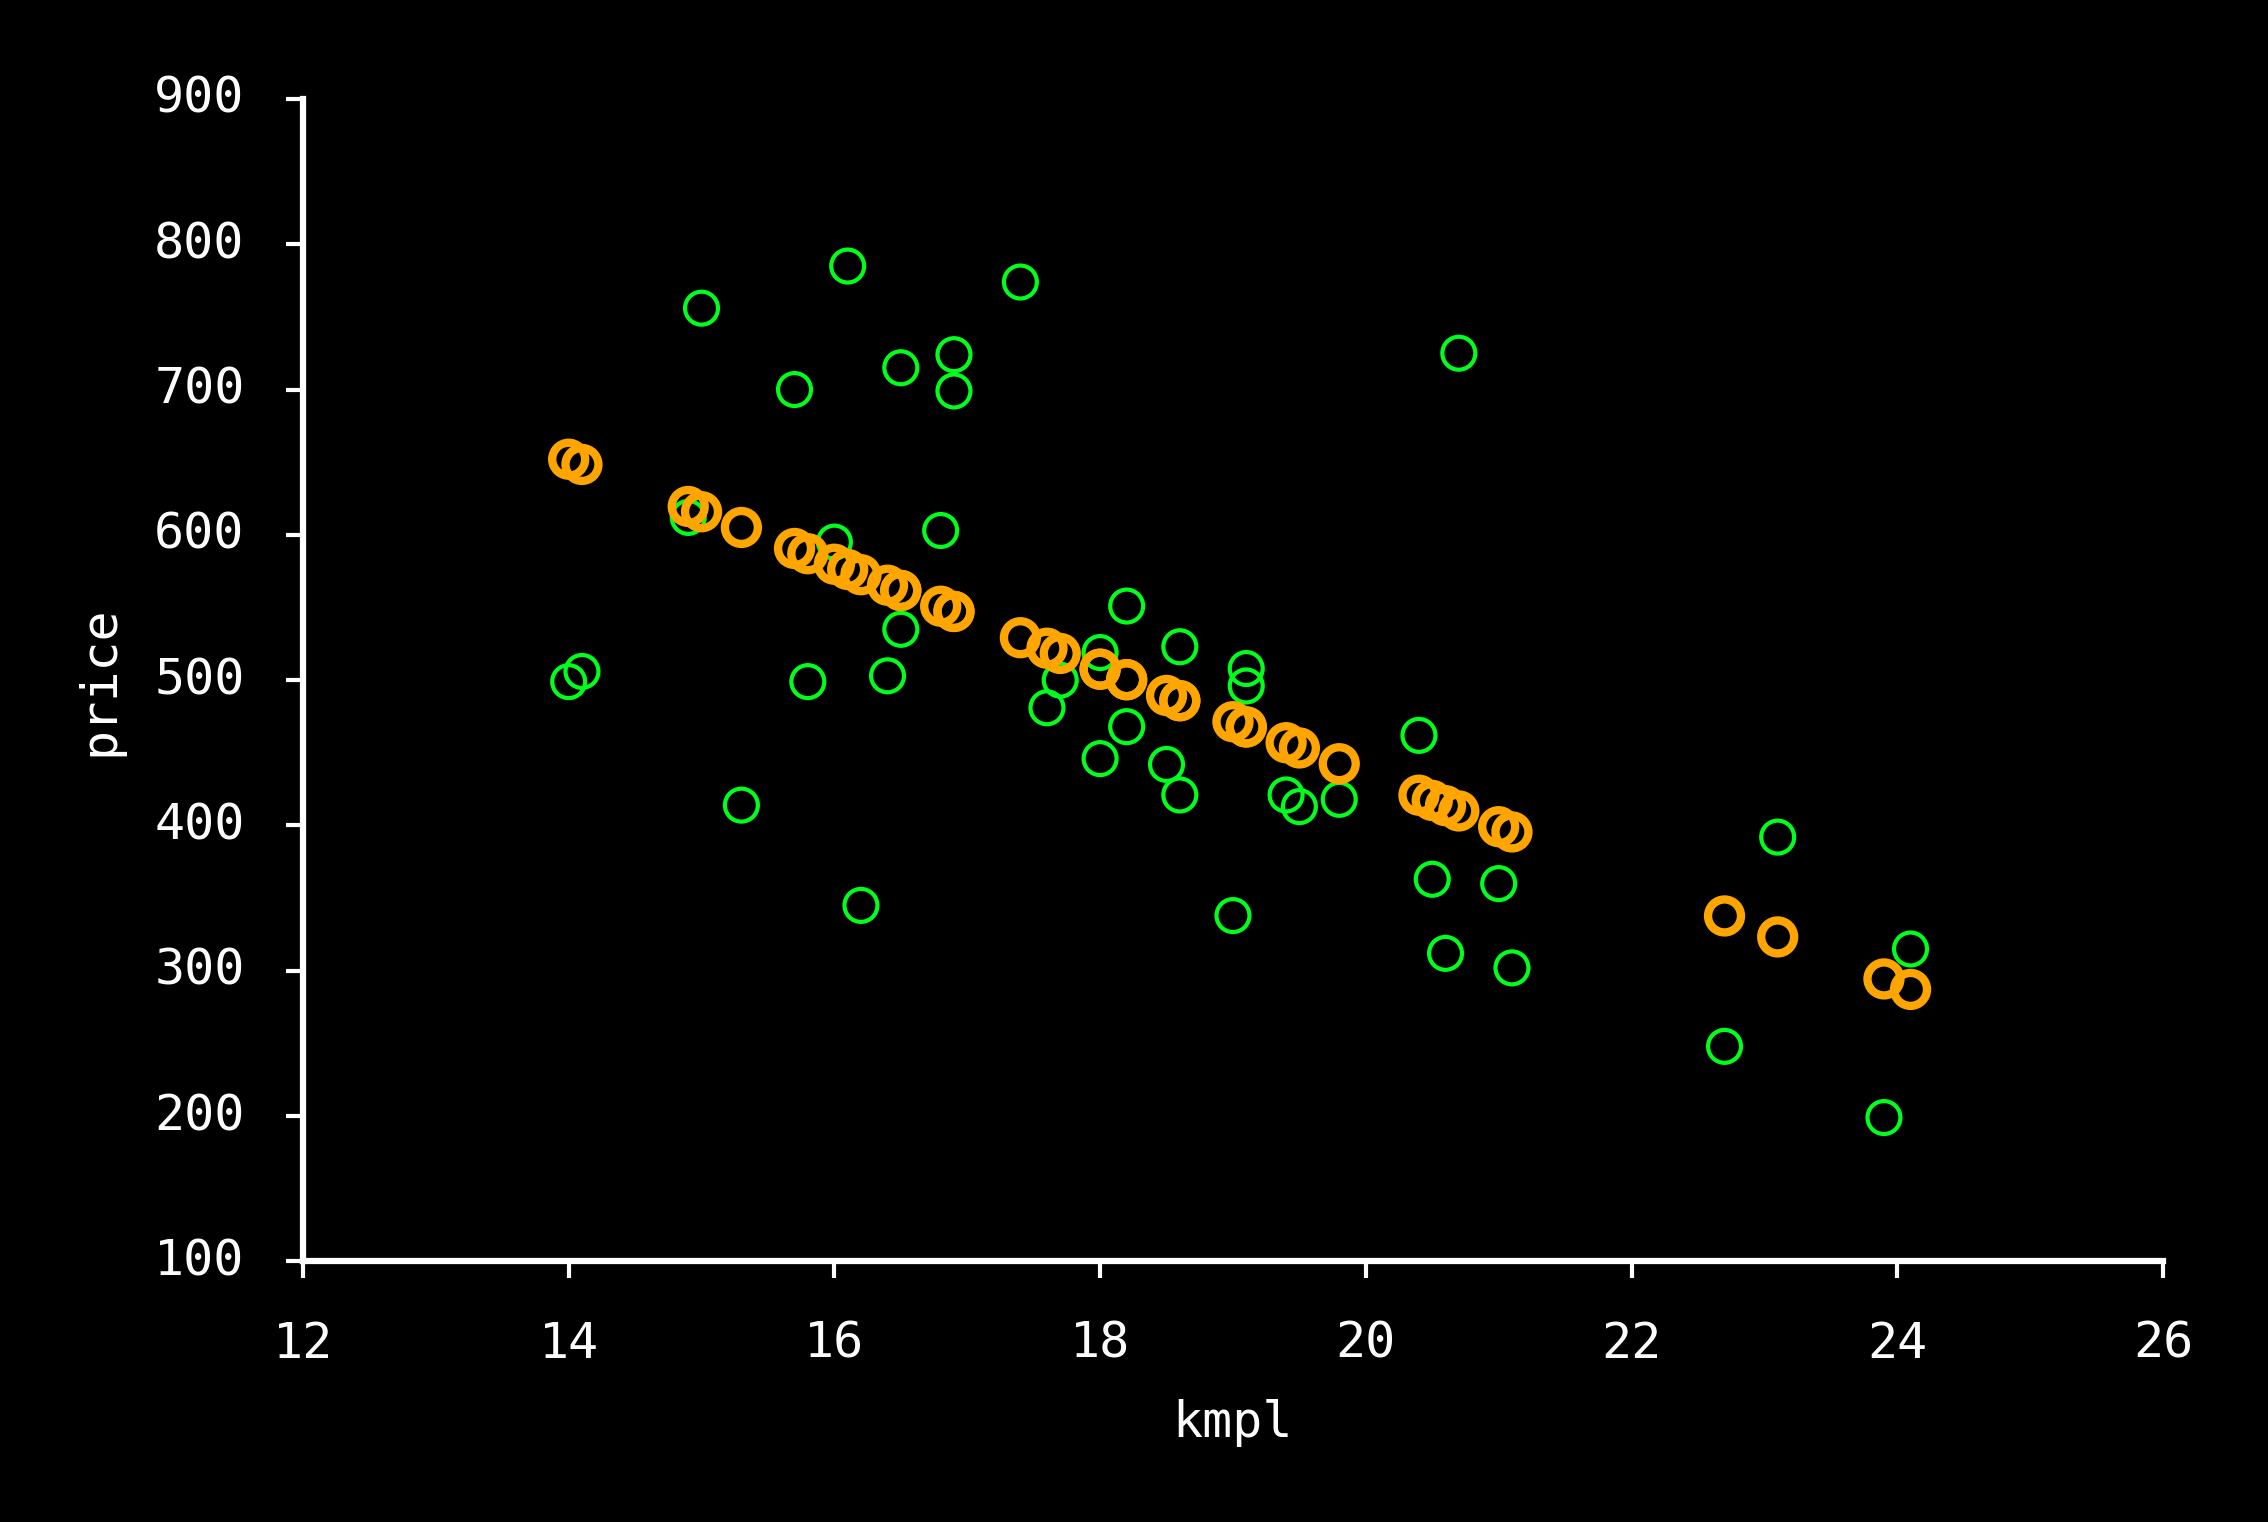

In [30]:
# Plot the data & model line
plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(kmpl, price_ols, s = 250, facecolor="None", edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_02.png")

## [2] Visualise the Model Parameters

### Ridge Regression

In [31]:
from sklearn import linear_model

def ridge_sklearn(df, alpha):
    y = df.price
    X = df.kmpl.reshape(-1,1)
    X = np.c_[np.ones((X.shape[0],1)),X]
    model = linear_model.Ridge(alpha = alpha, normalize = True, fit_intercept = False)
    model.fit(X,y)
    price_ridge = model.predict(X)
    beta, price_ridge = np.array([model.coef_]).T, price_ridge
    return beta, price_ridge

In [32]:
ridge_sklearn(cars, 0.1)

(array([[ 1024.88820299],
        [  -28.98918264]]),
 array([ 619.03964609,  616.14072783,  592.94938172,  590.05046346,
         581.35370867,  569.75803561,  566.85911735,  561.06128082,
         558.16236256,  555.26344429,  549.46560777,  546.5666895 ,
         546.5666895 ,  537.86993471,  534.97101645,  534.97101645,
         520.47642513,  514.6785886 ,  511.77967034,  503.08291555,
         503.08291555,  497.28507902,  497.28507902,  488.58832423,
         485.68940597,  485.68940597,  474.09373291,  471.19481465,
         471.19481465,  462.49805986,  459.5991416 ,  450.9023868 ,
         433.50887722,  430.60995896,  427.7110407 ,  424.81212243,
         416.11536764,  413.21644938,  366.83375716,  355.23808411,
         332.046738  ,  326.24890147]))

In [33]:
ridge_model, price_ridge = ridge_sklearn(cars, 0.1)

In [34]:
cars['price_ridge'] = price_ridge

In [35]:
beta_0_ridge, beta_1_ridge = ridge_model[0,0], ridge_model[1,0]

In [36]:
def ridge_plot(df, alphas, func):
    plt.scatter(df.kmpl, df.price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    plt.xlabel('kmpl')
    plt.ylabel('price')
    
    # Plot the Ridge line
    for a in alphas: 
        beta, price_ridge = func(df, a)
        x = np.arange(min(df.kmpl)-1, max(df.kmpl)+1, 1)
        y = beta[0,0] + beta[1,0] * x
        plt.plot(x, y, '-', c = orange)
        plt.text(x[-1] + 0.3, y[-1] - 10, r'$\alpha = $%s' % a)
    hide_spines()

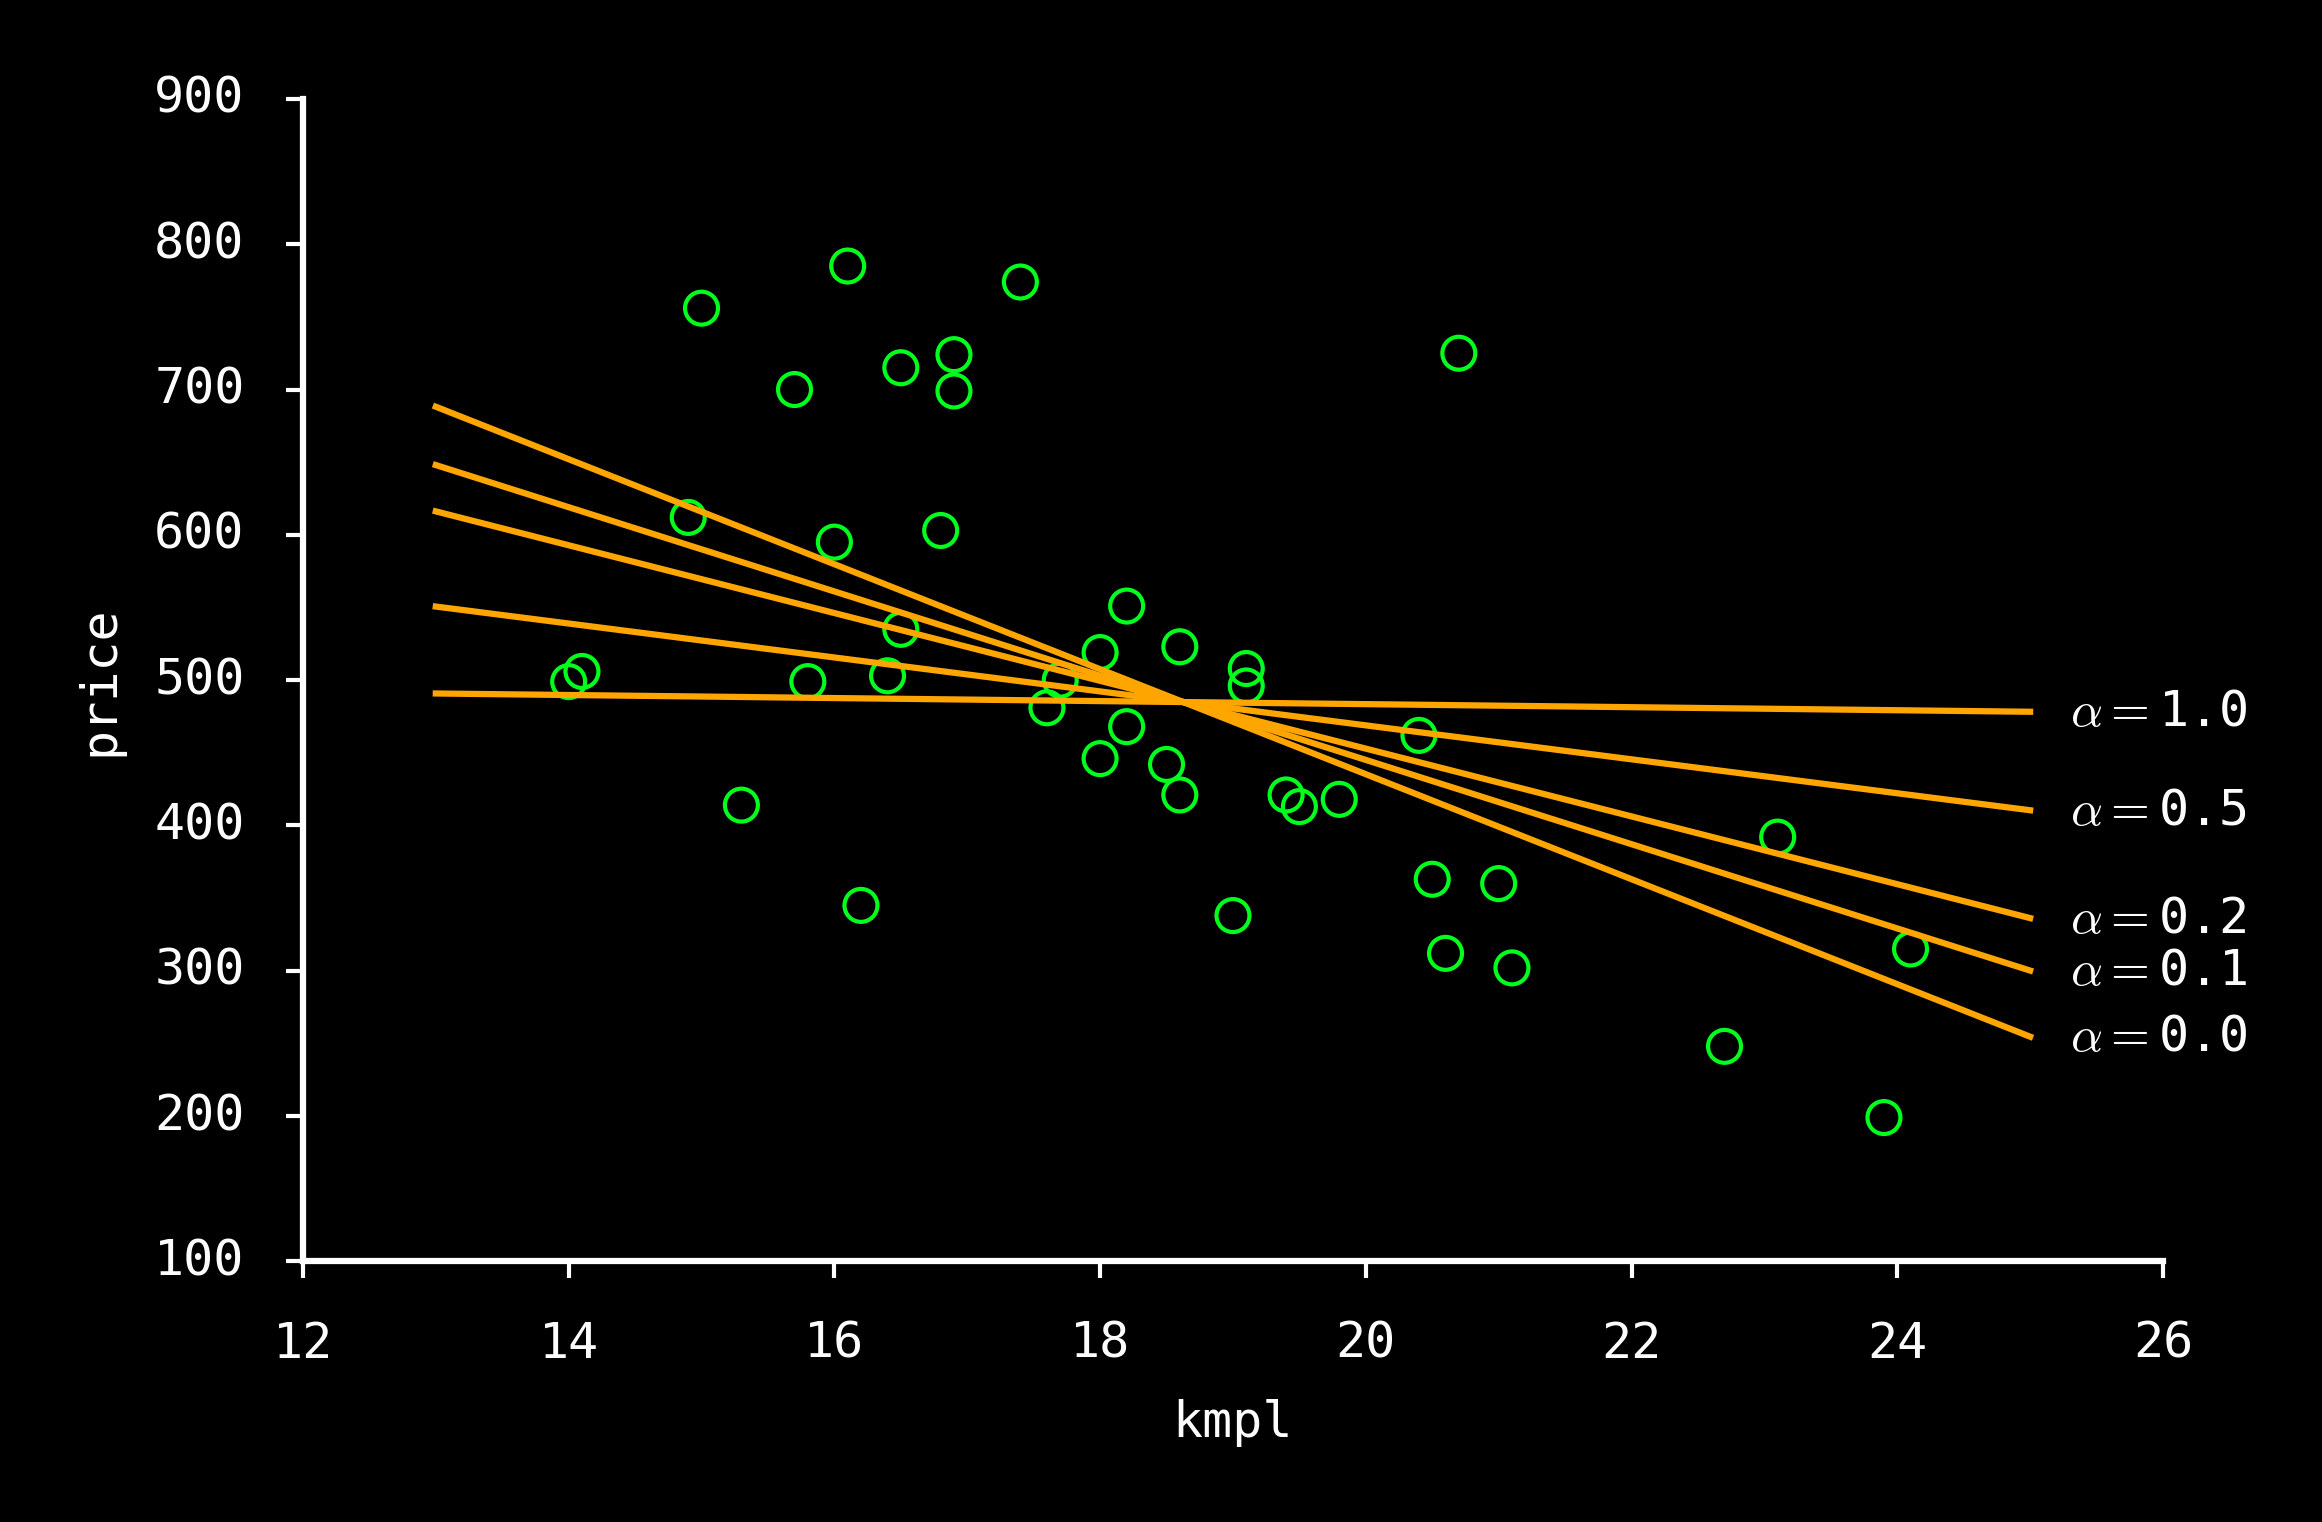

In [37]:
ridge_plot(cars, [0.0, 0.1, 0.5, 0.2, 1.0], ridge_sklearn)
plt.savefig("figures/fig_cars_03.png")

## [3] Visualise with different Input Parameters

### Bootstraping (Resampling)

In [44]:
def bootstrap_ridge_single (z, alpha, func):
    plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    beta = []
    for i in range(z):
        
        # Select a sample and run Ridge
        sample_random = cars.sample(n=cars.shape[0], replace = True)
        b, p = func(sample_random, alpha)
        beta.append([b[0,0], b[1,0]])
        
        # Get the Ridge line
        x = np.arange(min(cars.kmpl)-1, max(cars.kmpl)+1, 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        #plt.subplot(1, 2, 1)
        #plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the Ridge line
        plt.plot(x,y, '-', linewidth = 1, c = orange, alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(100,900)

        # Plot the intercept and coefficients
        #plt.subplot(1,2,2)
        #plt.scatter(beta[i][1],beta[i][0], s = 200, alpha = a, facecolor=orange, edgecolor=orange, linewidth=2)
        #plt.xlim(-120,60)
        #plt.ylim(-500,3000)
        #plt.xlabel('beta_1')
        #plt.ylabel('beta_0')
    
    # Plot the Population line
    #plt.subplot(1, 2, 1)
    x = np.arange(min(cars.kmpl)-1,max(cars.kmpl)+1,1)
    y_p = beta_0_ols + beta_1_ols * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'white', alpha = 0.6)
    hide_spines()

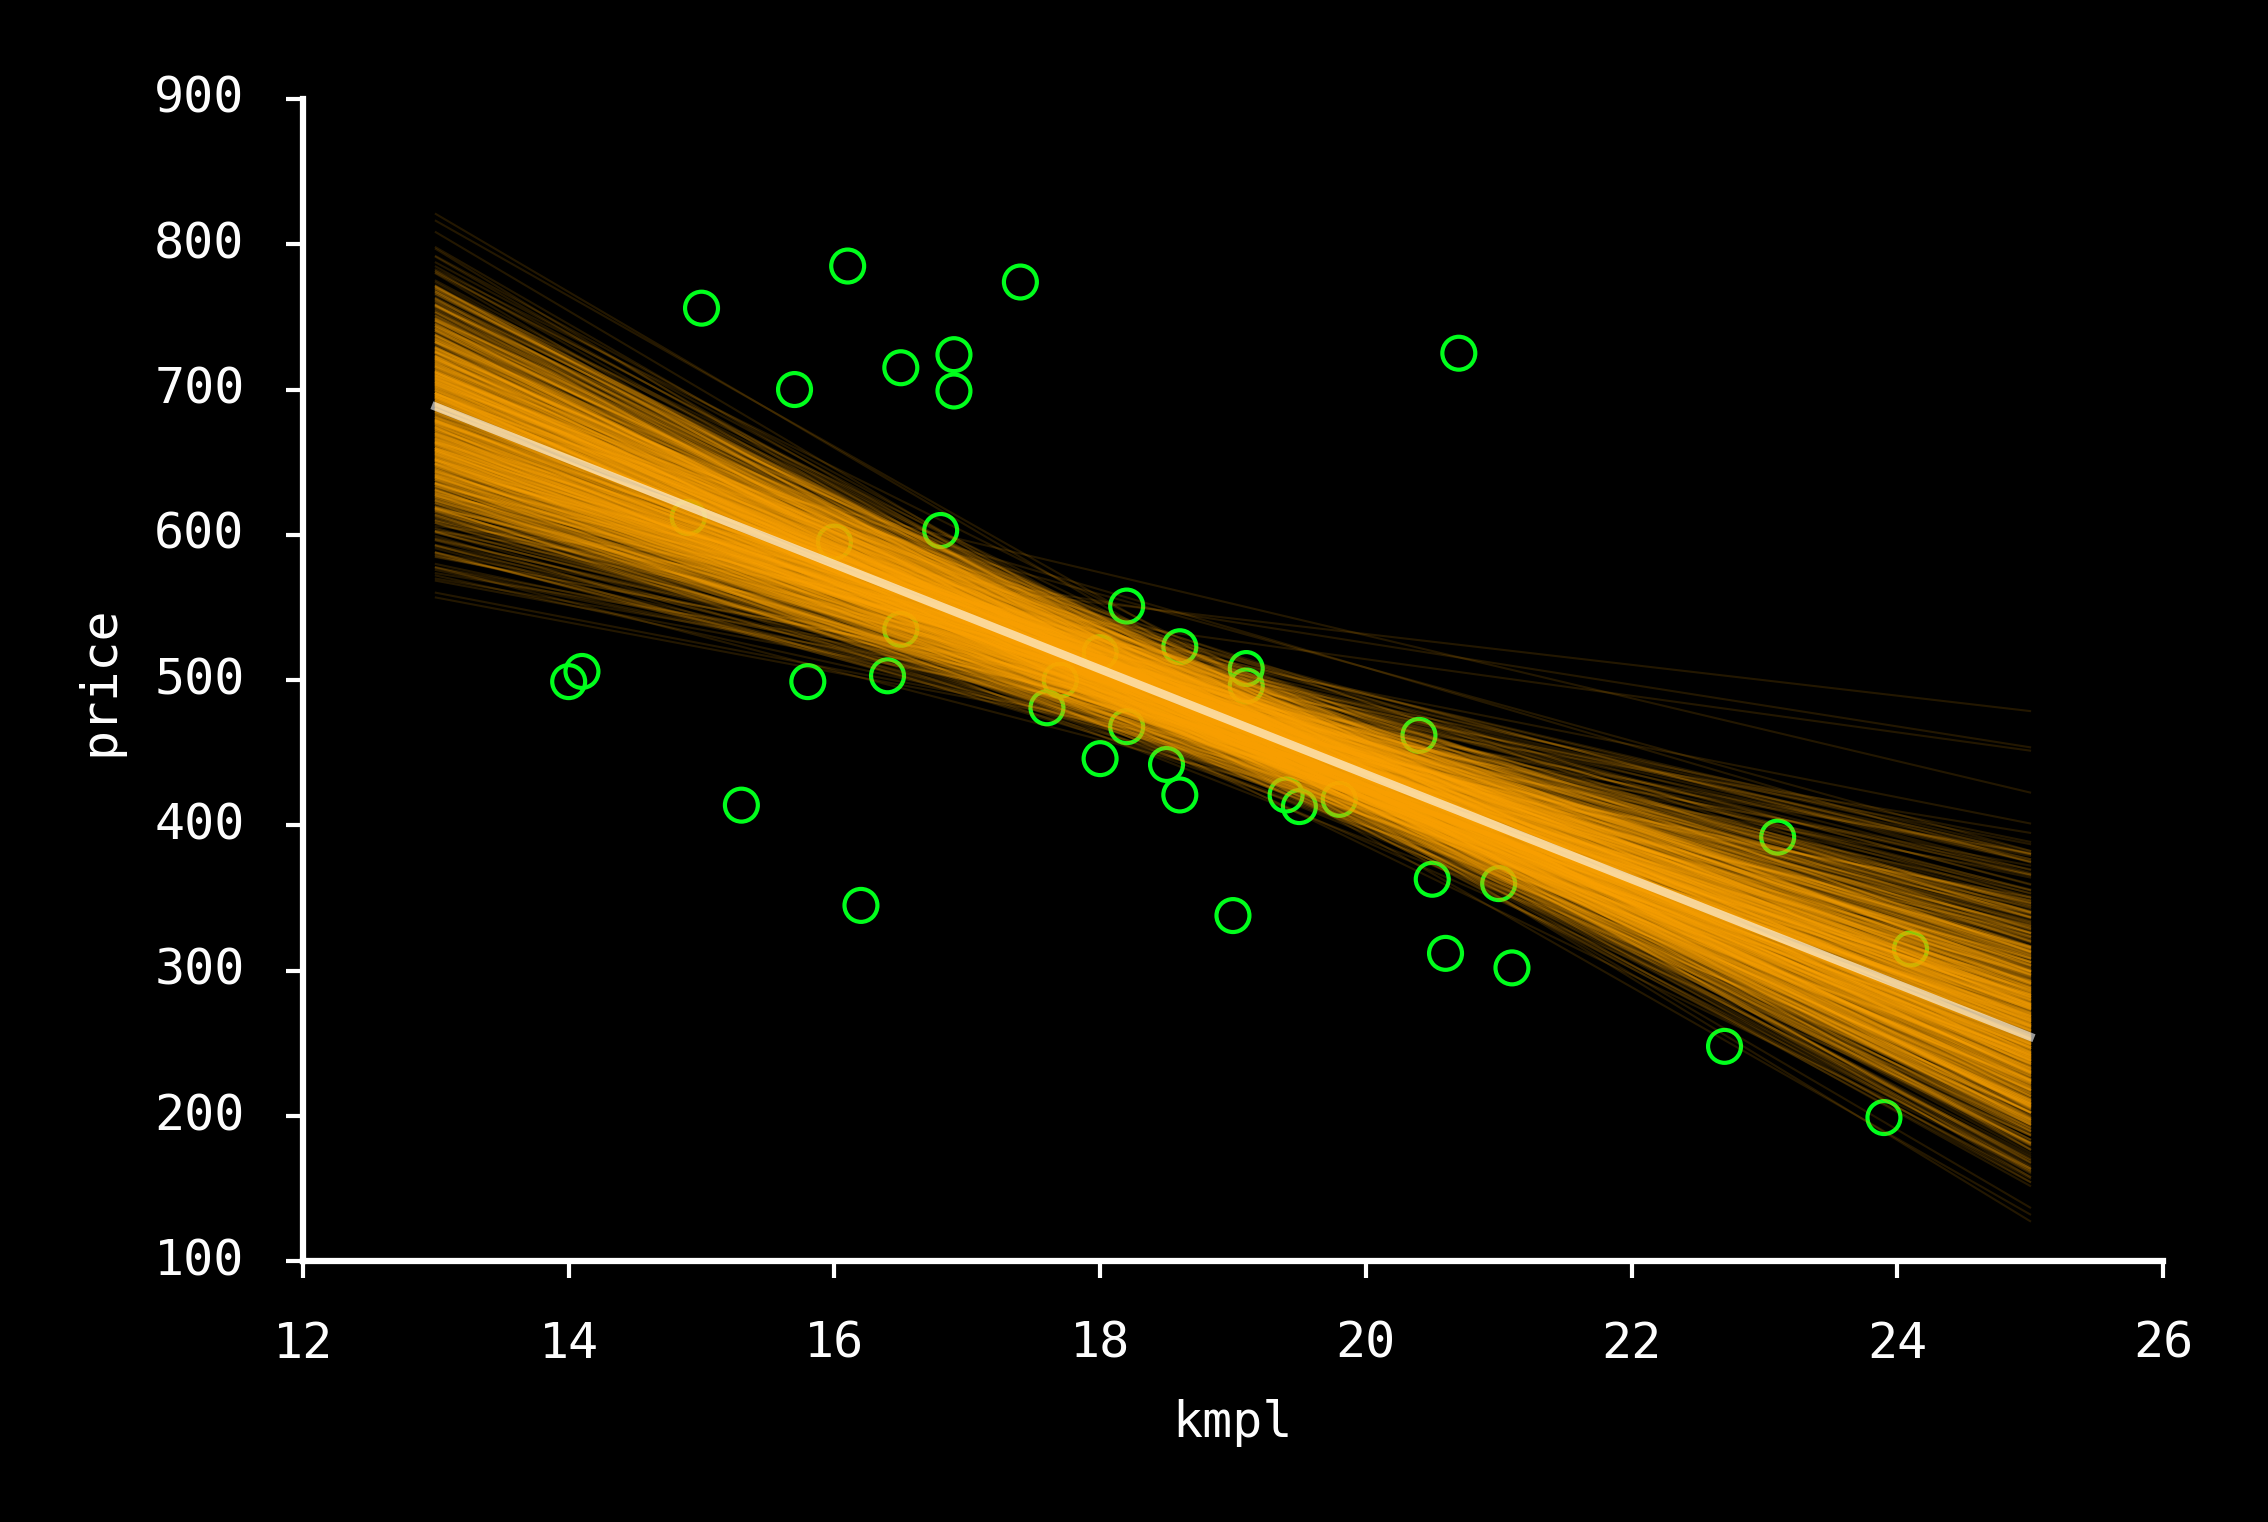

In [45]:
bootstrap_ridge_single (1000, [0.01], ridge_sklearn)
plt.savefig("figures/fig_cars_04.png")

In [46]:
def bootstrap_ridge_dual (z, alpha, func):
    # plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    beta = []
    for i in range(z):
        
        # Select a sample and run Ridge
        sample_random = cars.sample(n=cars.shape[0], replace = True)
        b,p = func(sample_random, alpha)
        beta.append([b[0,0], b[1,0]])
        
        # Get the Ridge line
        x = np.arange(min(cars.kmpl)-1, max(cars.kmpl)+1, 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        plt.subplot(1, 2, 1)
        plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the Ridge line
        plt.plot(x,y, '-', linewidth = 1, c = orange, alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(100,900)

        # Plot the intercept and coefficients
        plt.subplot(1,2,2)
        plt.scatter(beta[i][1],beta[i][0], s = 100, alpha = a, facecolor=orange, edgecolor=orange, linewidth=2)
        plt.xlabel('beta_1')
        plt.ylabel('beta_0')
    
    # Plot the Population line
    plt.subplot(1, 2, 1)
    x = np.arange(min(cars.kmpl)-1,max(cars.kmpl)+1,1)
    y_p = beta_0_ols + beta_1_ols * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'white', alpha = 0.6)
    hide_spines()

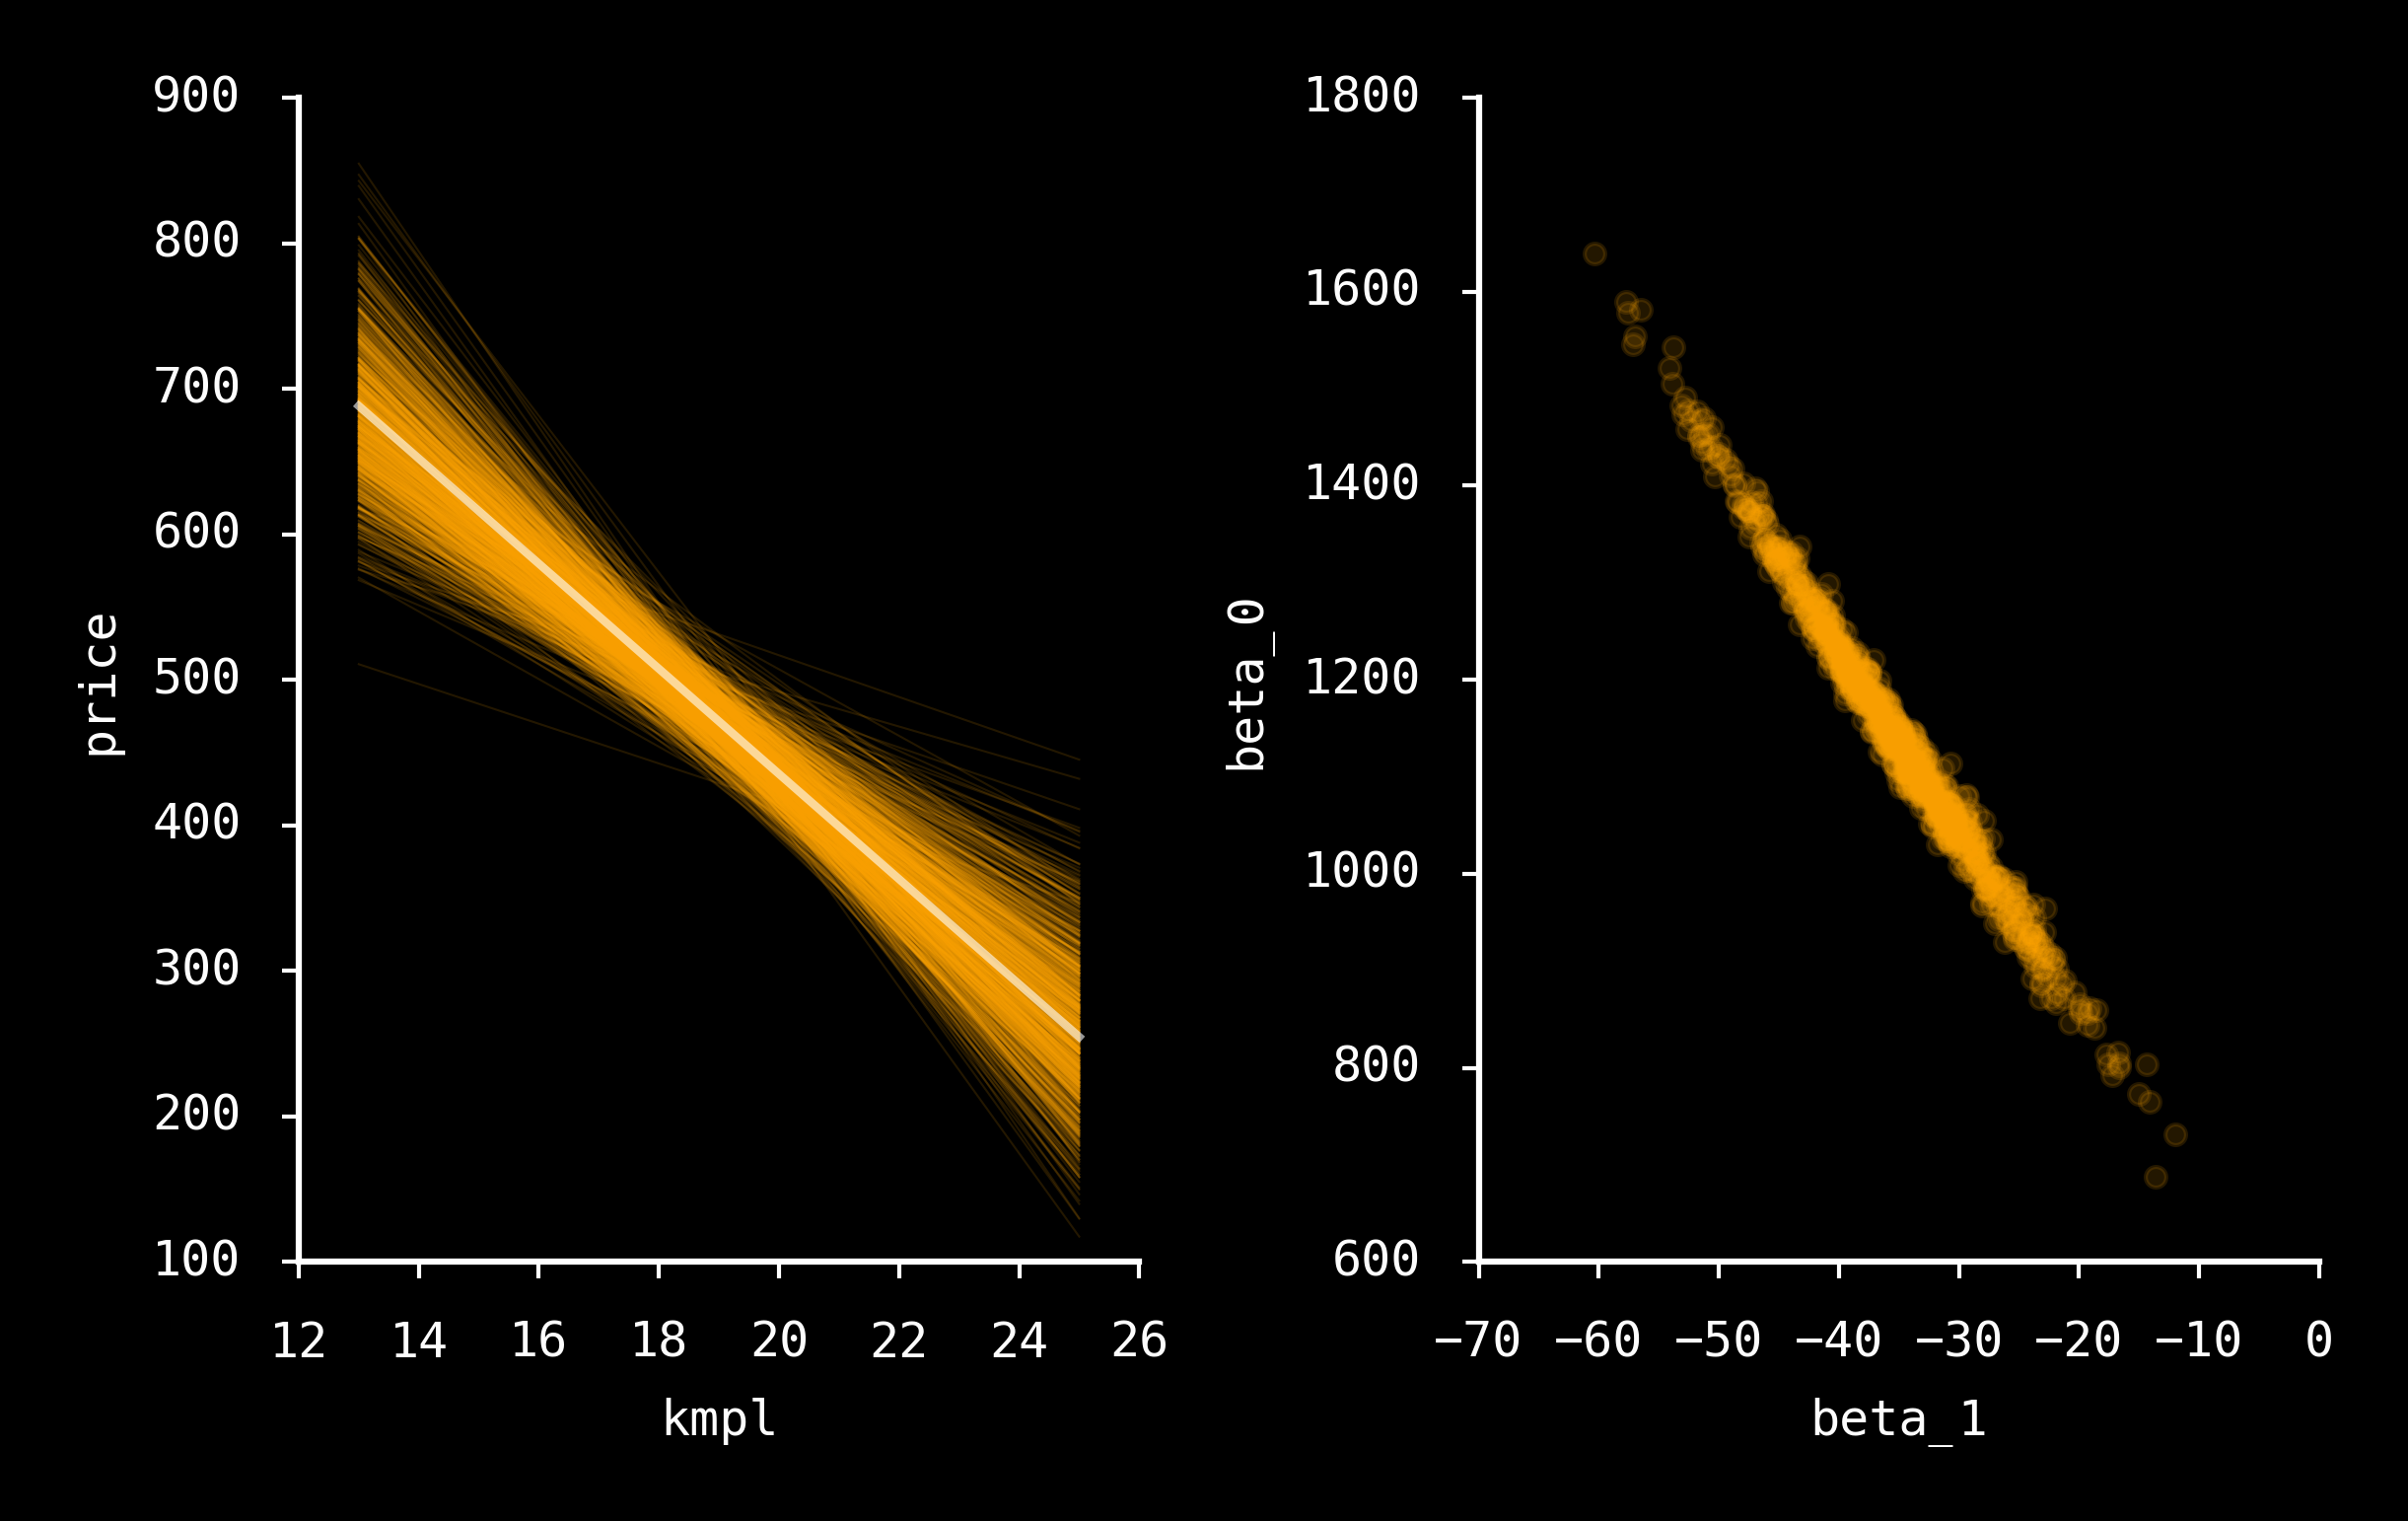

In [47]:
bootstrap_ridge_dual (1000, 0.01, ridge_sklearn)
plt.savefig("figures/fig_cars_05.png")

## [4] Visualise the Model Space

In [50]:
import statsmodels.formula.api as sm
model_poly3 = sm.ols('price ~ np.power(kmpl, 3) + np.power(kmpl, 2) + kmpl', cars).fit()
price_poly3 = model_poly3.predict(kmpl)

In [51]:
cars['price_poly3'] = price_poly3

In [52]:
from statsmodels.nonparametric.smoothers_lowess import lowess
price_lowess = lowess(price, kmpl)[:,1]

In [53]:
cars['price_lowess'] = price_lowess

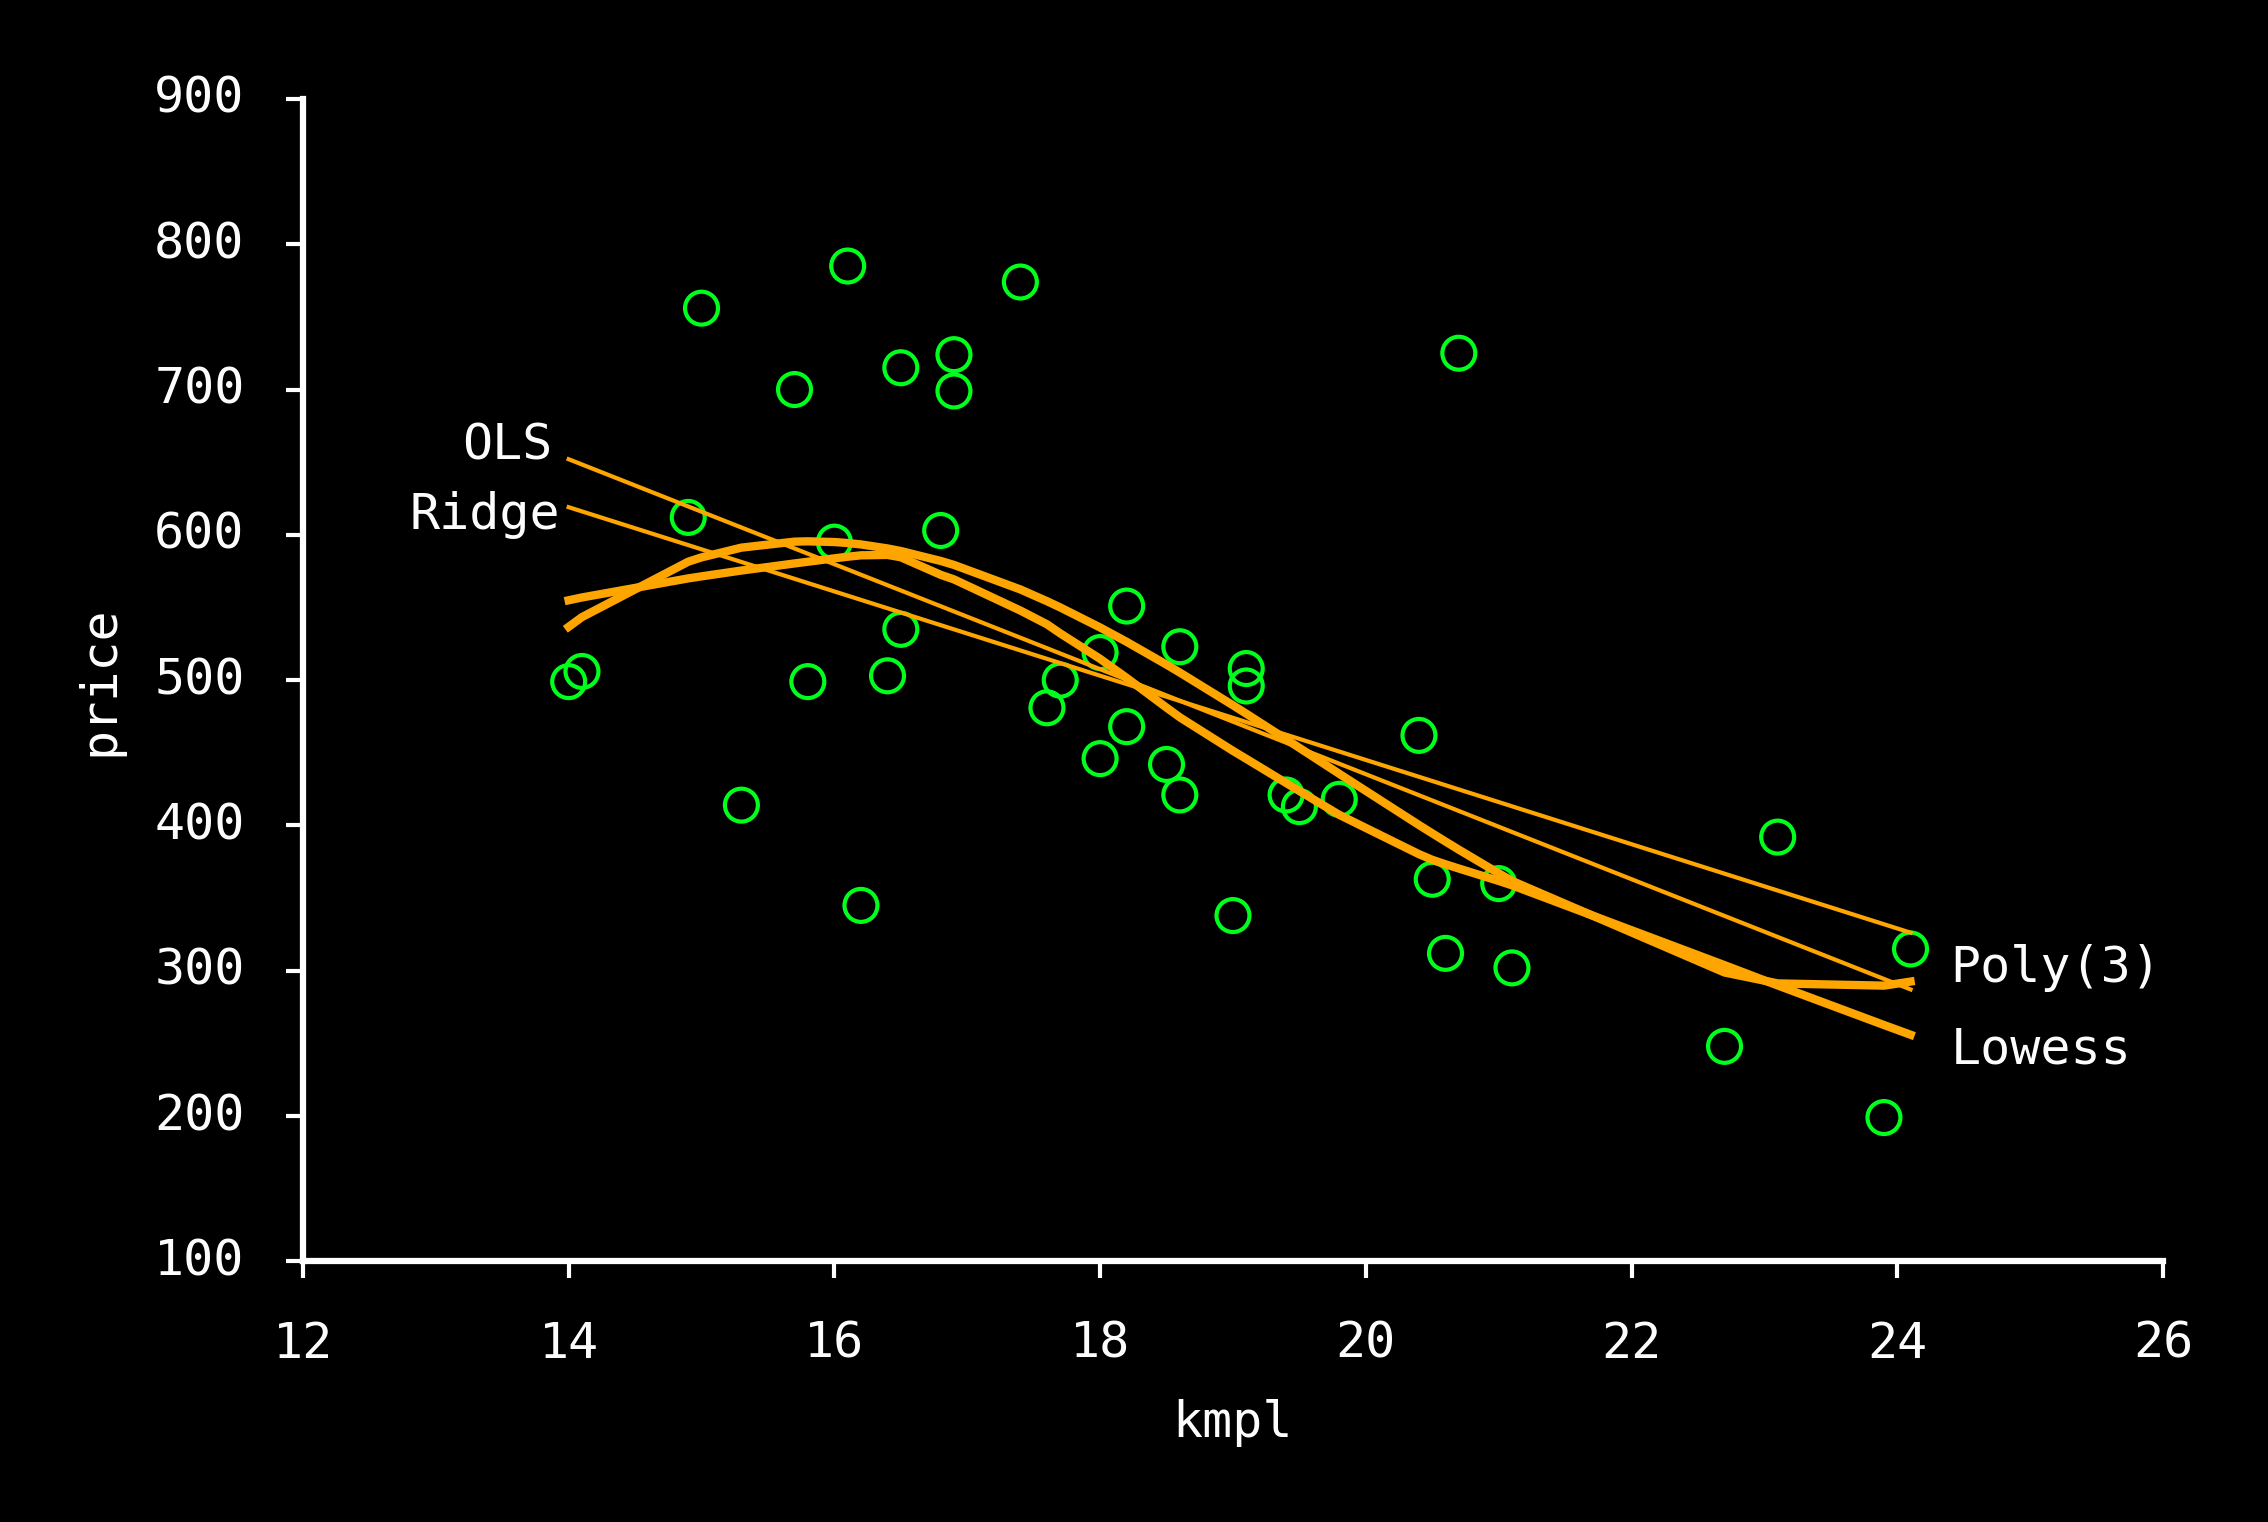

In [54]:
# Plot the data & model line
x = np.array(kmpl)
y = np.array(price)
y1 = np.array(cars.price_ols)
y2 = np.array(cars.price_ridge)
y3 = np.array(cars.price_lowess)
y4 = np.array(cars.price_poly3)

plt.scatter(x, y, s = 250, facecolor="None", edgecolor=green, linewidth=2)

plt.plot(x, y1, '-', linewidth ="2", c = 'orange')
plt.text(x[0] - 0.8, y1[0], 'OLS')

plt.plot(x, y2, '-', linewidth ="2", c = 'orange')
plt.text(x[0] - 1.2, y2[0] - 15, 'Ridge')

plt.plot(x, y3, '-', linewidth ="4", c = 'orange')
plt.text(x[-1] + 0.3, y3[-1] - 20, 'Lowess')

plt.plot(x, y4, '-', linewidth ="4", c = 'orange')
plt.text(x[-1] + 0.3, y4[-1], 'Poly(3)')

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_06.png")

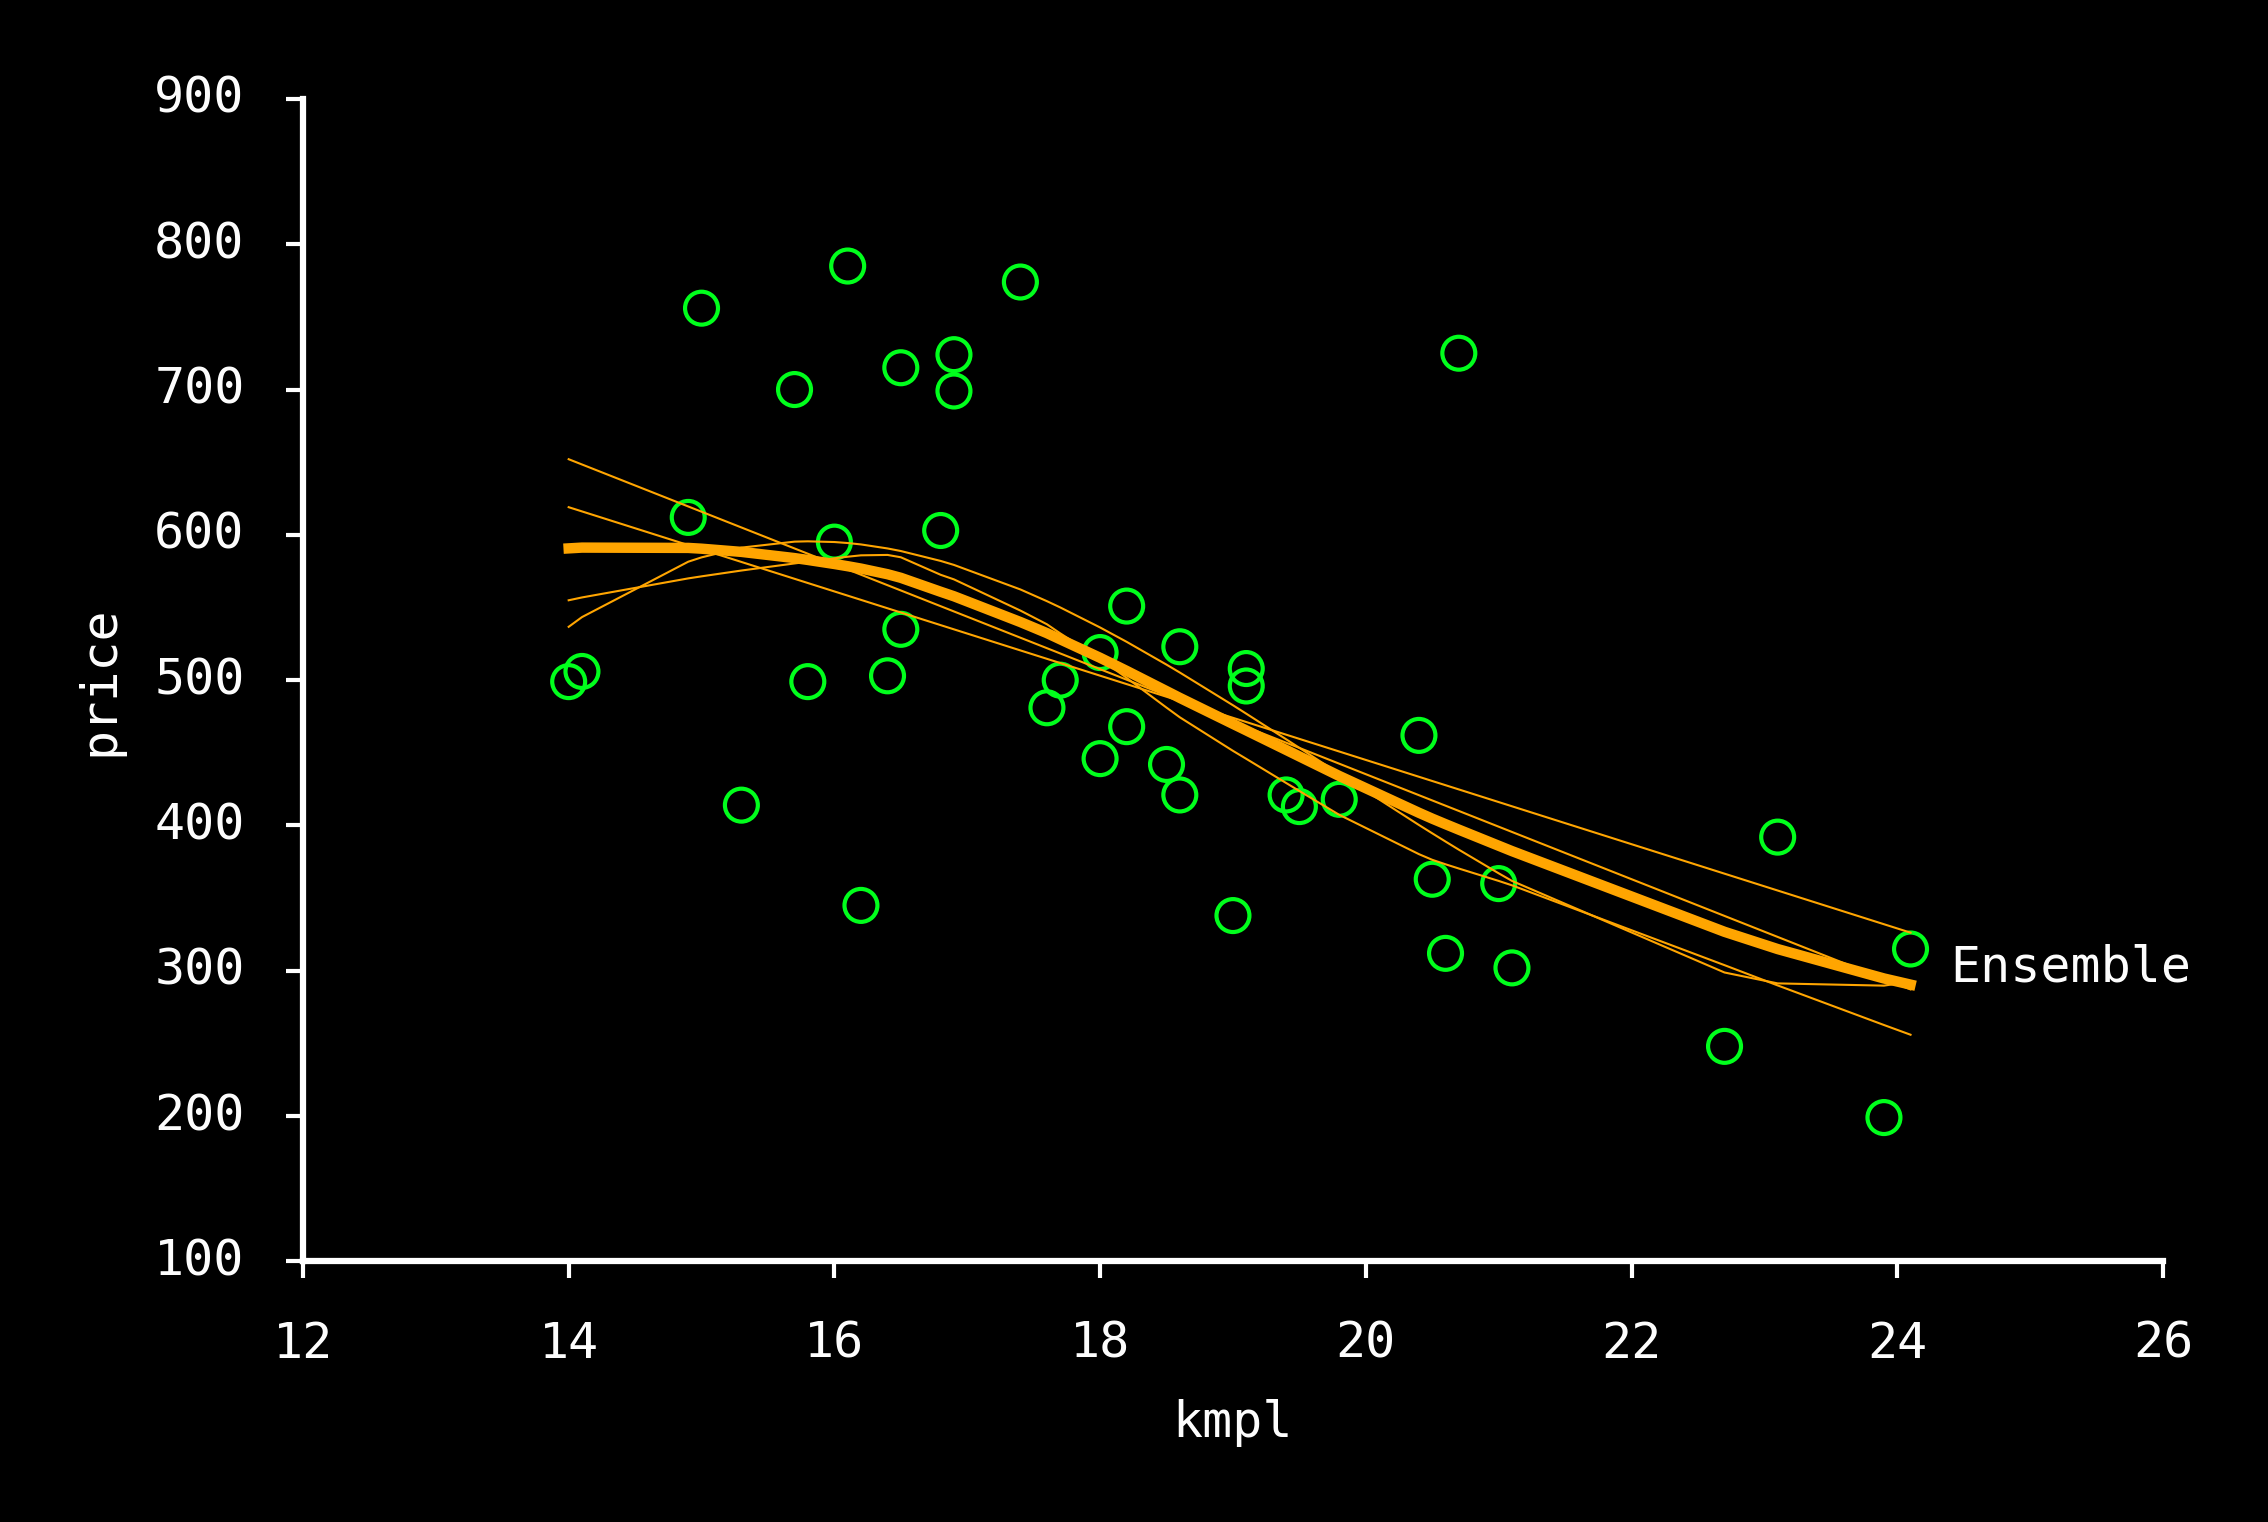

In [384]:
# Plot the data & model line
x = np.array(kmpl)
y = np.array(price)
y1 = np.array(cars.price_ols)
y2 = np.array(cars.price_ridge)
y3 = np.array(cars.price_lowess)
y4 = np.array(cars.price_poly3)

y5 = (y1 + y2 + y3 + y4)/4

plt.scatter(x, y, s = 250, facecolor="None", edgecolor=green, linewidth=2)

plt.plot(x, y1, '-', linewidth ="1", c = 'orange')

plt.plot(x, y2, '-', linewidth ="1", c = 'orange')

plt.plot(x, y3, '-', linewidth ="1", c = 'orange')

plt.plot(x, y4, '-', linewidth ="1", c = 'orange')

plt.plot(x, y5, '-', linewidth ="5", c = 'orange')
plt.text(x[-1] + 0.3, y4[-1], 'Ensemble')

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_06b.png")

## [4] Visualise the model & feature space

In [188]:
ols_4X = np.asmatrix(cars.loc[:,('kmpl','types', 'bhp')])
ols_4y = np.asmatrix(cars.loc[:,'price']).T
model_ols_4 = linear_model.LinearRegression().fit(ols_4X,ols_3y)
price_ols_4 = model_ols_4.predict(ols_4X)
beta_0_ols_4, beta_1_ols_4 = model_ols_4.intercept_, model_ols_4.coef_
print(beta_0_ols_4, beta_1_ols_4)

[ 255.31597083] [[-10.25096534  93.21500059   4.91513687]]


In [227]:
cars['price_ols_4'] = price_ols_4
cars['price_ols_4_error'] = cars['price_ols_4'] - cars['price']

In [367]:
# Cross Validation
from sklearn.cross_validation import cross_val_predict
lr = linear_model.LinearRegression()
price_ols_4_val = cross_val_predict(lr, ols_4X, ols_4y, cv=6)
cars['price_ols_4_val'] = price_ols_4_val

In [368]:
cars['price_ols_4_val'] = price_ols_4
cars['price_ols_4_val_error'] = cars['price_ols_4_val'] - cars['price']

In [325]:
# Does not work as facecolor needs to be int
markcolor = [green, "None"]
facecolor = [markcolor[i] for i in list(types.astype(int))]

In [326]:
cars0 = cars[cars.types == 0].copy(deep=True)
cars1 = cars[cars.types == 1].copy(deep=True)

In [327]:
cars0

brand           model  price  kmpl  bhp       type  types  \
8         Ford            Figo    414  15.3   70  hatchback    0.0   
6         Fiat       Punto Evo    499  15.8   67  hatchback    0.0   
3    Chevrolet           Spark    345  16.2   62  hatchback    0.0   
32       Skoda           Fabia    503  16.4   75  hatchback    0.0   
39  Volkswagen            Polo    535  16.5   74  hatchback    0.0   
38      Toyota      Etios Liva    500  17.7   79  hatchback    0.0   
29     Renault           Pulse    446  18.0   74  hatchback    0.0   
2    Chevrolet  Sail Hatchback    468  18.2   82  hatchback    0.0   
21      Suzuki            Ritz    442  18.5   86  hatchback    0.0   
13     Hyundai             i20    523  18.6   82  hatchback    0.0   
0    Chevrolet            Beat    421  18.6   79  hatchback    0.0   
20      Suzuki          Estilo    338  19.0   67  hatchback    0.0   
10       Honda            Brio    421  19.4   87  hatchback    0.0   
27      Nissan           Micra    413  19.5   67  hatchback    0.0   
12     Hyundai             i10    418  19.8   68  hatchback    0.0   
22      Suzuki           Swift    462  20.4   83  hatchback    0.0   
25      Suzuki         Wagon-R    363  20.5   67  hatchback    0.0   
26      Nissan       Datsun GO    312  20.6   67  hatchback    0.0   
40  Volkswagen              Up    360  21.0   74  hatchback    0.0   
11     Hyundai             EON    302  21.1   55  hatchback    0.0   
17      Suzuki        Alto 800    248  22.7   47  hatchback    0.0   
18      Suzuki         Celerio    392  23.1   67  hatchback    0.0   
35        Tata            Nano    199  23.9   38  hatchback    0.0   
16      Suzuki            Alto    315  24.1   67  hatchback    0.0   

     price_ols  price_ridge  price_poly3  price_lowess  price_ols_4  \
8   605.085998   581.353709   591.213006    575.448897   442.535782   
6   587.022902   566.859117   595.546488    581.508738   422.664889   
3   572.572425   555.263444   593.408314    585.910669   393.988818   
32  565.347186   549.465608   590.645288    586.183864   455.835404   
39  561.734567   546.566690   588.868031    584.573799   449.895171   
38  518.383136   511.779670   550.053619    532.205347   462.169697   
29  507.545278   503.082916   536.256755    514.685139   434.518723   
2   500.320040   497.285079   526.373812    501.559731   471.789625   
21  489.482182   488.588324   510.680374    481.101742   488.374883   
13  485.869563   485.689406   505.249195    474.442528   467.689239   
0   485.869563   485.689406   505.249195    474.442528   452.943828   
20  471.419086   474.093733   482.735675    451.358753   389.861800   
10  456.968609   462.498060   459.340541    429.256837   484.064151   
27  453.355990   459.599142   453.413453    423.728079   384.736317   
12  442.518132   450.902387   435.571079    407.326801   386.576164   
22  420.842417   433.508877   400.324712    380.266704   454.152638   
25  417.229797   430.609959   394.599619    376.373349   374.485352   
26  413.617178   427.711041   388.938320    373.290973   373.460255   
40  399.166701   416.115368   367.089597    361.843204   403.765827   
11  395.554082   413.216449   361.866166    358.821715   309.353130   
17  337.752174   366.833757   298.825160    303.875707   253.630490   
18  323.301697   355.238084   291.323668    289.928394   347.832842   
35  294.400743   332.046738   289.782207    262.689471   197.093100   
16  287.175505   326.248901   292.571222    255.996524   337.581876   

    price_ols_4_error  price_ols_val  price_ols_4_val  price_ols_4_val_error  
8           28.535782     470.117450       442.535782              28.535782  
6          -76.335111     402.304301       422.664889             -76.335111  
3           48.988818     370.014266       393.988818              48.988818  
32         -47.164596     442.029331       455.835404             -47.164596  
39         -85.104829     436.366627       449.895171             -85.104829  
38      

In [328]:
cars1

brand          model  price  kmpl  bhp   type  types   price_ols  \
34        Tata         Indigo    499  14.0   65  sedan    1.0  652.050048   
7         Ford        Classic    506  14.1  100  sedan    1.0  648.437429   
4         Fiat  Linea Classic    612  14.9   89  sedan    1.0  619.536475   
33       Skoda          Rapid    756  15.0  104  sedan    1.0  615.923855   
5         Fiat          Linea    700  15.7  112  sedan    1.0  590.635521   
31         San          Storm    595  16.0   59  sedan    1.0  579.797663   
41  Volkswagen          Vento    785  16.1  104  sedan    1.0  576.185044   
24      Suzuki            SX4    715  16.5  103  sedan    1.0  561.734567   
37      Toyota          Etios    603  16.8   89  sedan    1.0  550.896709   
28      Nissan          Sunny    699  16.9   98  sedan    1.0  547.284090   
30     Renault          Scala    724  16.9   98  sedan    1.0  547.284090   
14     Hyundai          Verna    774  17.4  106  sedan    1.0  529.220994   
36        Tata           Zest    481  17.6   89  sedan    1.0  521.995755   
9        Honda          Amaze    519  18.0   87  sedan    1.0  507.545278   
1    Chevrolet           Sail    551  18.2   82  sedan    1.0  500.320040   
15     Hyundai          Xcent    496  19.1   82  sedan    1.0  467.806467   
23      Suzuki    Swift DZire    508  19.1   86  sedan    1.0  467.806467   
19      Suzuki           Ciaz    725  20.7   91  sedan    1.0  410.004559   

    price_ridge  price_poly3  price_lowess  price_ols_4  price_ols_4_error  \
34   619.039646   536.712899    554.980489   524.501353          25.501353   
7    616.140728   543.391791    556.925094   695.506047         189.506047   
4    592.949382   581.523005    570.040040   633.238769          21.238769   
33   590.050463   584.495812    571.445057   705.940726         -50.059274   
5    569.758036   595.328986    580.329066   738.086145          38.086145   
31   561.061281   595.063185    583.841400   474.508601        -120.491399   
41   558.162363   594.378232    584.952499   694.664664         -90.335336   
24   546.566690   588.868031    584.573799   685.649141         -29.350859   
37   537.869935   582.048409    572.509918   613.761935          10.761935   
28   534.971016   579.305671    569.354500   656.973070         -42.026930   
30   534.971016   579.305671    569.354500   656.973070         -67.026930   
14   520.476425   562.427191    547.896917   691.168683         -82.831317   
36   514.678589   554.346855    538.446906   605.561163         124.561163   
9    503.082916   536.256755    514.685139   591.630503          72.630503   
1    497.285079   526.373812    501.559731   565.004625          14.004625   
15   471.194815   476.949727    445.871327   555.778757          59.778757   
23   471.194815   476.949727    445.871327   575.439304          67.439304   
19   424.812122   383.348742    370.386274   583.613444        -141.386556   

    price_ols_val  price_ols_4_val  price_ols_4_val_error  
34     569.963767       524.501353              25.501353  
7      726.645881       695.506047             189.506047  
4      663.737584       633.238769              21.238769  
33     729.947862       705.940726             -50.059274  
5      742.918235       738.086145              38.086145  
31     425.490722       474.508601            -120.491399  
41     692.767693       694.664664             -90.335336  
24     683.118298       685.649141             -29.350859  
37     612.545258       613.761935              10.761935  
28     648.461433       656.973070             -42.026930  
30     648.461433       656.973070             -67.026930  
14     678.976699       691.168683             -82.831317  
36     600.461549       605.561163             124.561163  
9      598.808909       591.630503              72.630503  
1      572.897809       565.004625              14.004625  
15     567.455268       555.778757              59.778757  
23     587.431246       575.439304        

In [329]:
cars1.shape

(18, 16)

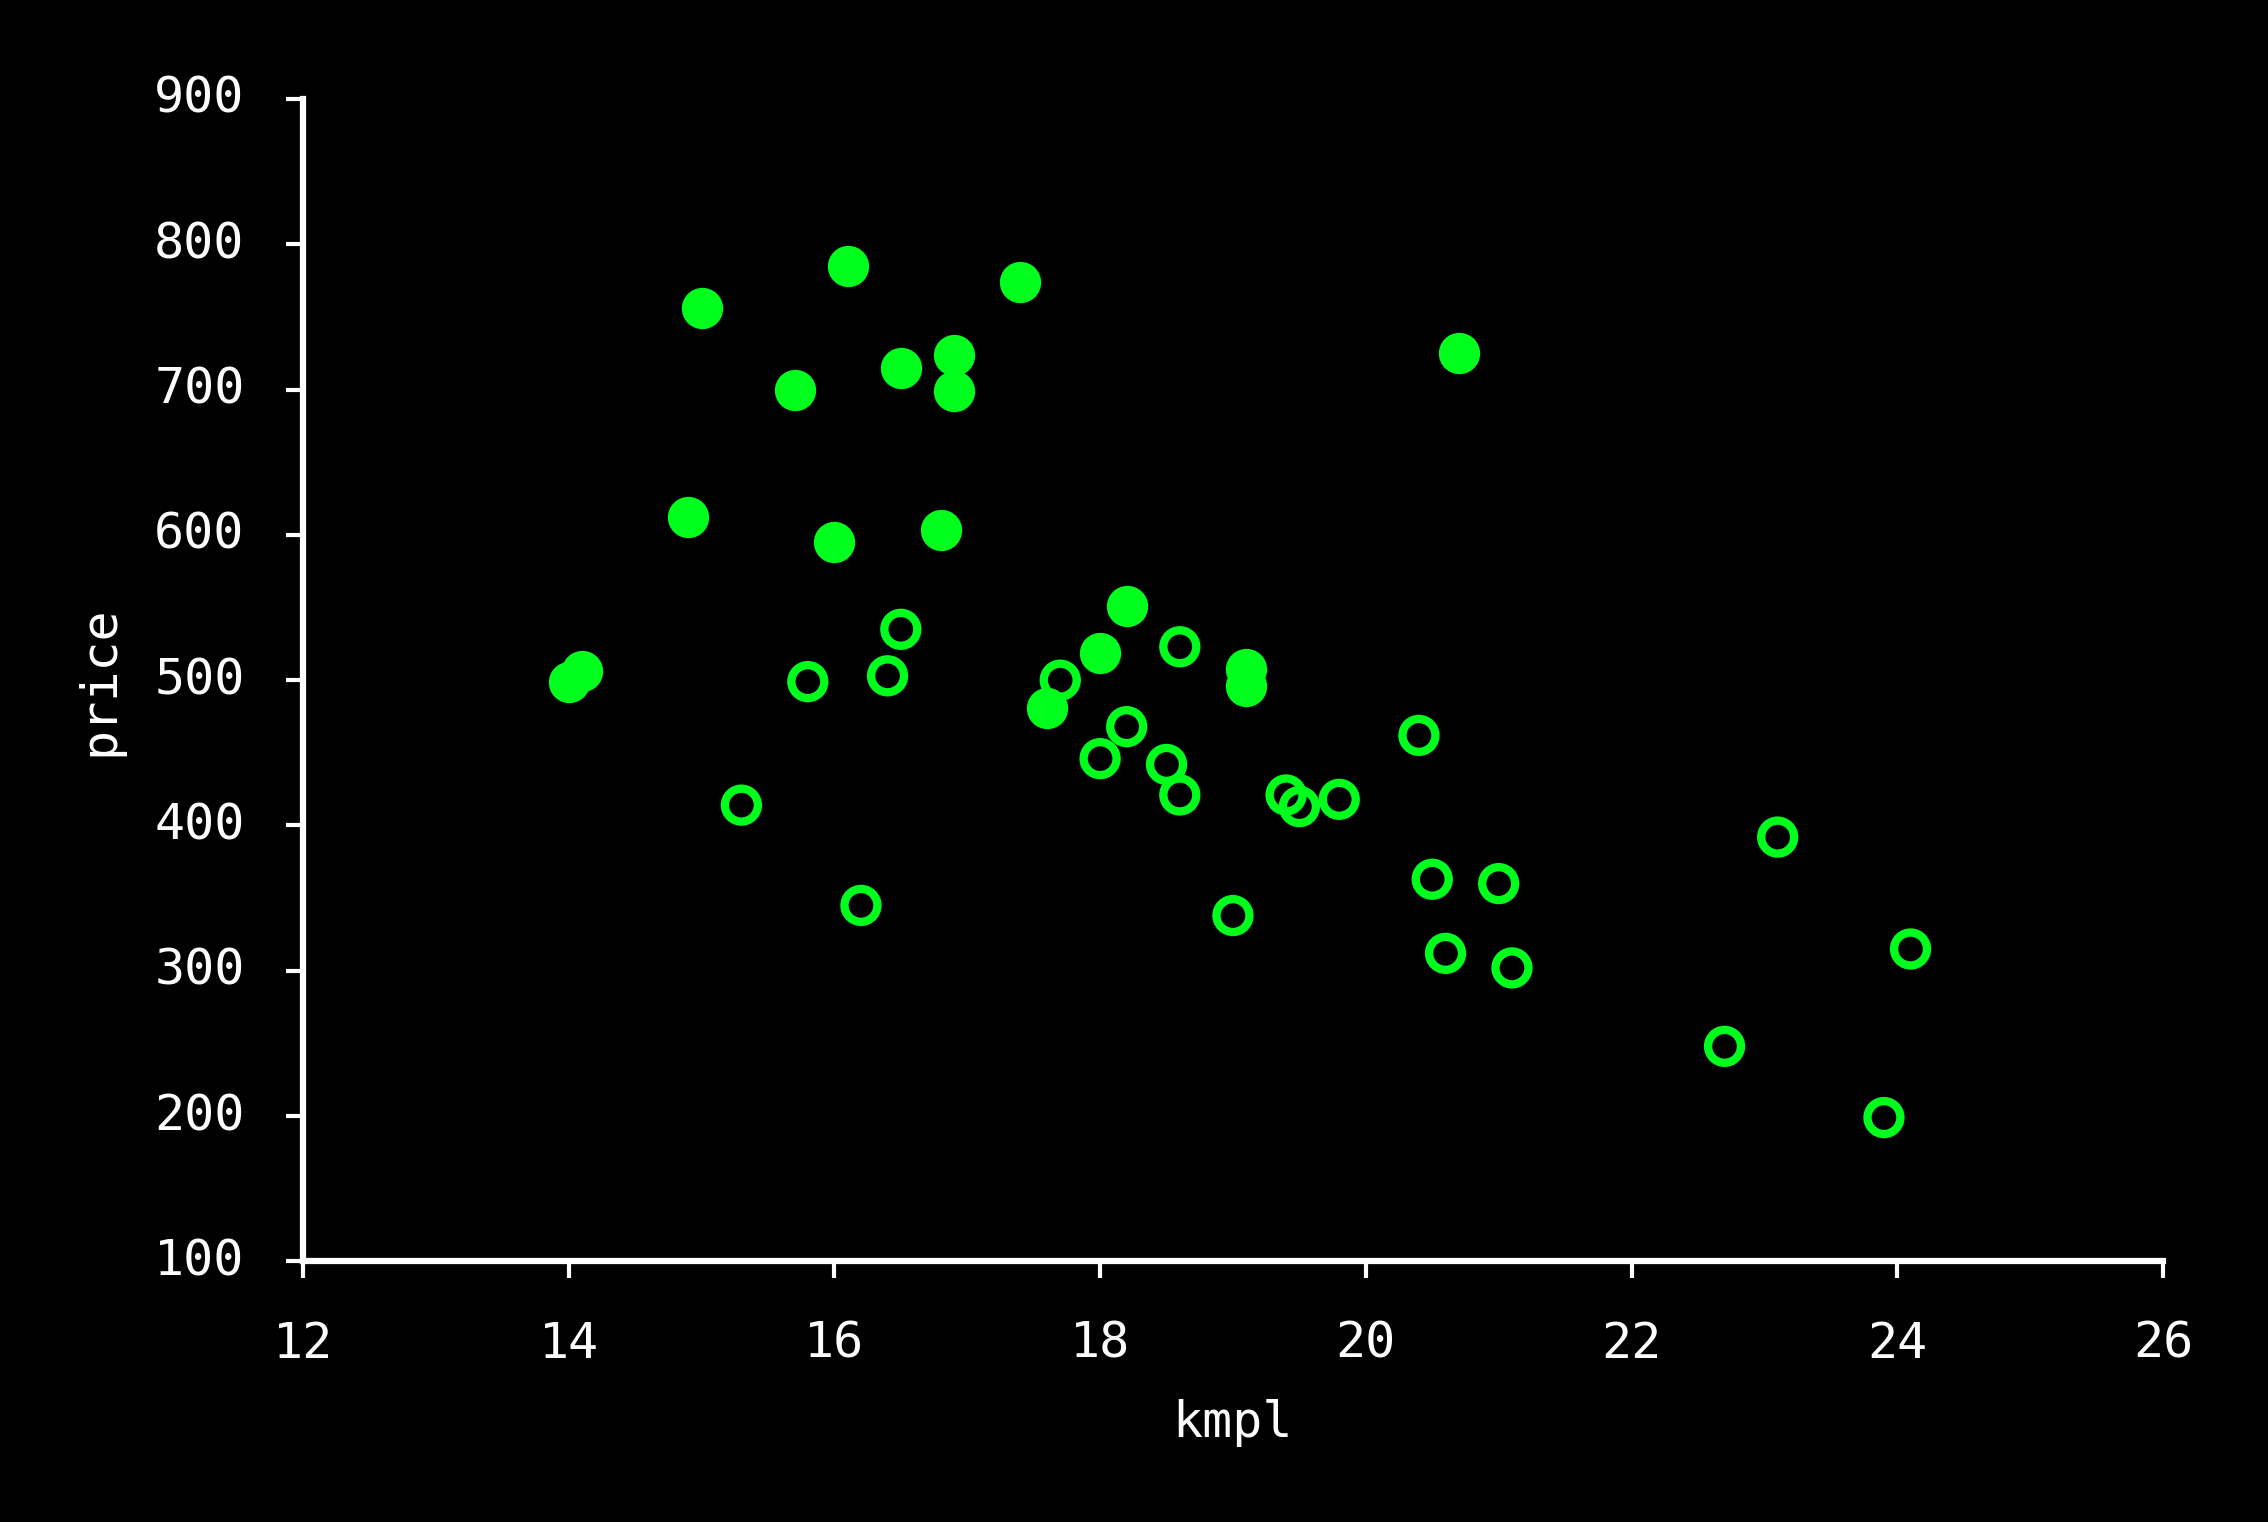

In [330]:
plt.scatter(cars0.kmpl, cars0.price, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(cars1.kmpl, cars1.price, s = 250, facecolor=green, edgecolor=green, linewidth=4)
plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_07.png")

In [331]:
# Run OLS 3 features
def ols(kmpl_in,price_in):
    # print(df)
    model = linear_model.LinearRegression().fit(kmpl_in.reshape(-1,1),price_in)
    # print(df.shape)
    price_model = model_ols.predict(kmpl_in.reshape(-1,1))
    beta, price_model = np.array([model.intercept_, model.coef_[0]]).T, price_model
    #print(beta, price_model)
    return price_model

In [332]:
kmpl0 = np.array(cars0.kmpl)
kmpl1 = np.array(cars1.kmpl)

In [333]:
price0 = np.array(cars0.price)
price1 = np.array(cars1.price)

In [334]:
price0.shape, kmpl0.shape, price_lowess_0.shape

((24,), (24,), (24,))

In [335]:
price1.shape, kmpl1.shape, price_lowess_1.shape

((18,), (18,), (18,))

In [336]:
from statsmodels.nonparametric.smoothers_lowess import lowess
price_lowess_0 = lowess(price0, kmpl0)[:,1]
price_lowess_1 = lowess(price1, kmpl1, frac=0.8)[:,1]

In [337]:
price0.shape, kmpl0.shape, price_lowess_0.shape

((24,), (24,), (24,))

In [338]:
price1.shape, kmpl1.shape, price_lowess_1.shape

((18,), (18,), (18,))

In [339]:
price_lowess_0

array([ 467.79107839,  467.55781899,  466.77905201,  466.24623485,
        465.96581593,  463.56977477,  460.51148556,  457.45049375,
        448.14626141,  444.54457911,  444.54457911,  429.58845482,
        412.44144838,  408.06436037,  395.22233218,  369.31895504,
        364.97753581,  360.27899957,  347.73897181,  344.92553539,
        303.42144479,  292.67027559,  271.97677759,  266.89623126])

In [340]:
price_lowess_1

array([ 540.93588619,  548.57874419,  605.65745042,  612.55472675,
        665.37220424,  685.998527  ,  685.17812509,  670.75960067,
        657.93724561,  653.04525761,  653.04525761,  616.15954159,
        601.8487589 ,  571.80164503,  555.12524748,  567.95894361,
        567.95894361,  603.15526274])

In [341]:
kmpl1

array([ 14. ,  14.1,  14.9,  15. ,  15.7,  16. ,  16.1,  16.5,  16.8,
        16.9,  16.9,  17.4,  17.6,  18. ,  18.2,  19.1,  19.1,  20.7])

In [342]:
price1

array([499, 506, 612, 756, 700, 595, 785, 715, 603, 699, 724, 774, 481,
       519, 551, 496, 508, 725])

In [343]:
cars0.price_ols

8     605.085998
6     587.022902
3     572.572425
32    565.347186
39    561.734567
38    518.383136
29    507.545278
2     500.320040
21    489.482182
13    485.869563
0     485.869563
20    471.419086
10    456.968609
27    453.355990
12    442.518132
22    420.842417
25    417.229797
26    413.617178
40    399.166701
11    395.554082
17    337.752174
18    323.301697
35    294.400743
16    287.175505
Name: price_ols, dtype: float64

In [344]:
price_ols_type0 = ols(kmpl0,price0)
price_ols_type0

array([ 605.08599769,  587.02290151,  572.57242456,  565.34718609,
        561.73456686,  518.38313602,  507.54527831,  500.32003984,
        489.48218213,  485.86956289,  485.86956289,  471.41908595,
        456.968609  ,  453.35598977,  442.51813206,  420.84241664,
        417.22979741,  413.61717817,  399.16670122,  395.55408199,
        337.75217421,  323.30169726,  294.40074337,  287.1755049 ])

In [345]:
price_ols_type1 = ols(kmpl0, price0)

In [346]:
kmpl_type1.shape

(18,)

In [347]:
price_ols_type1.shape

(24,)

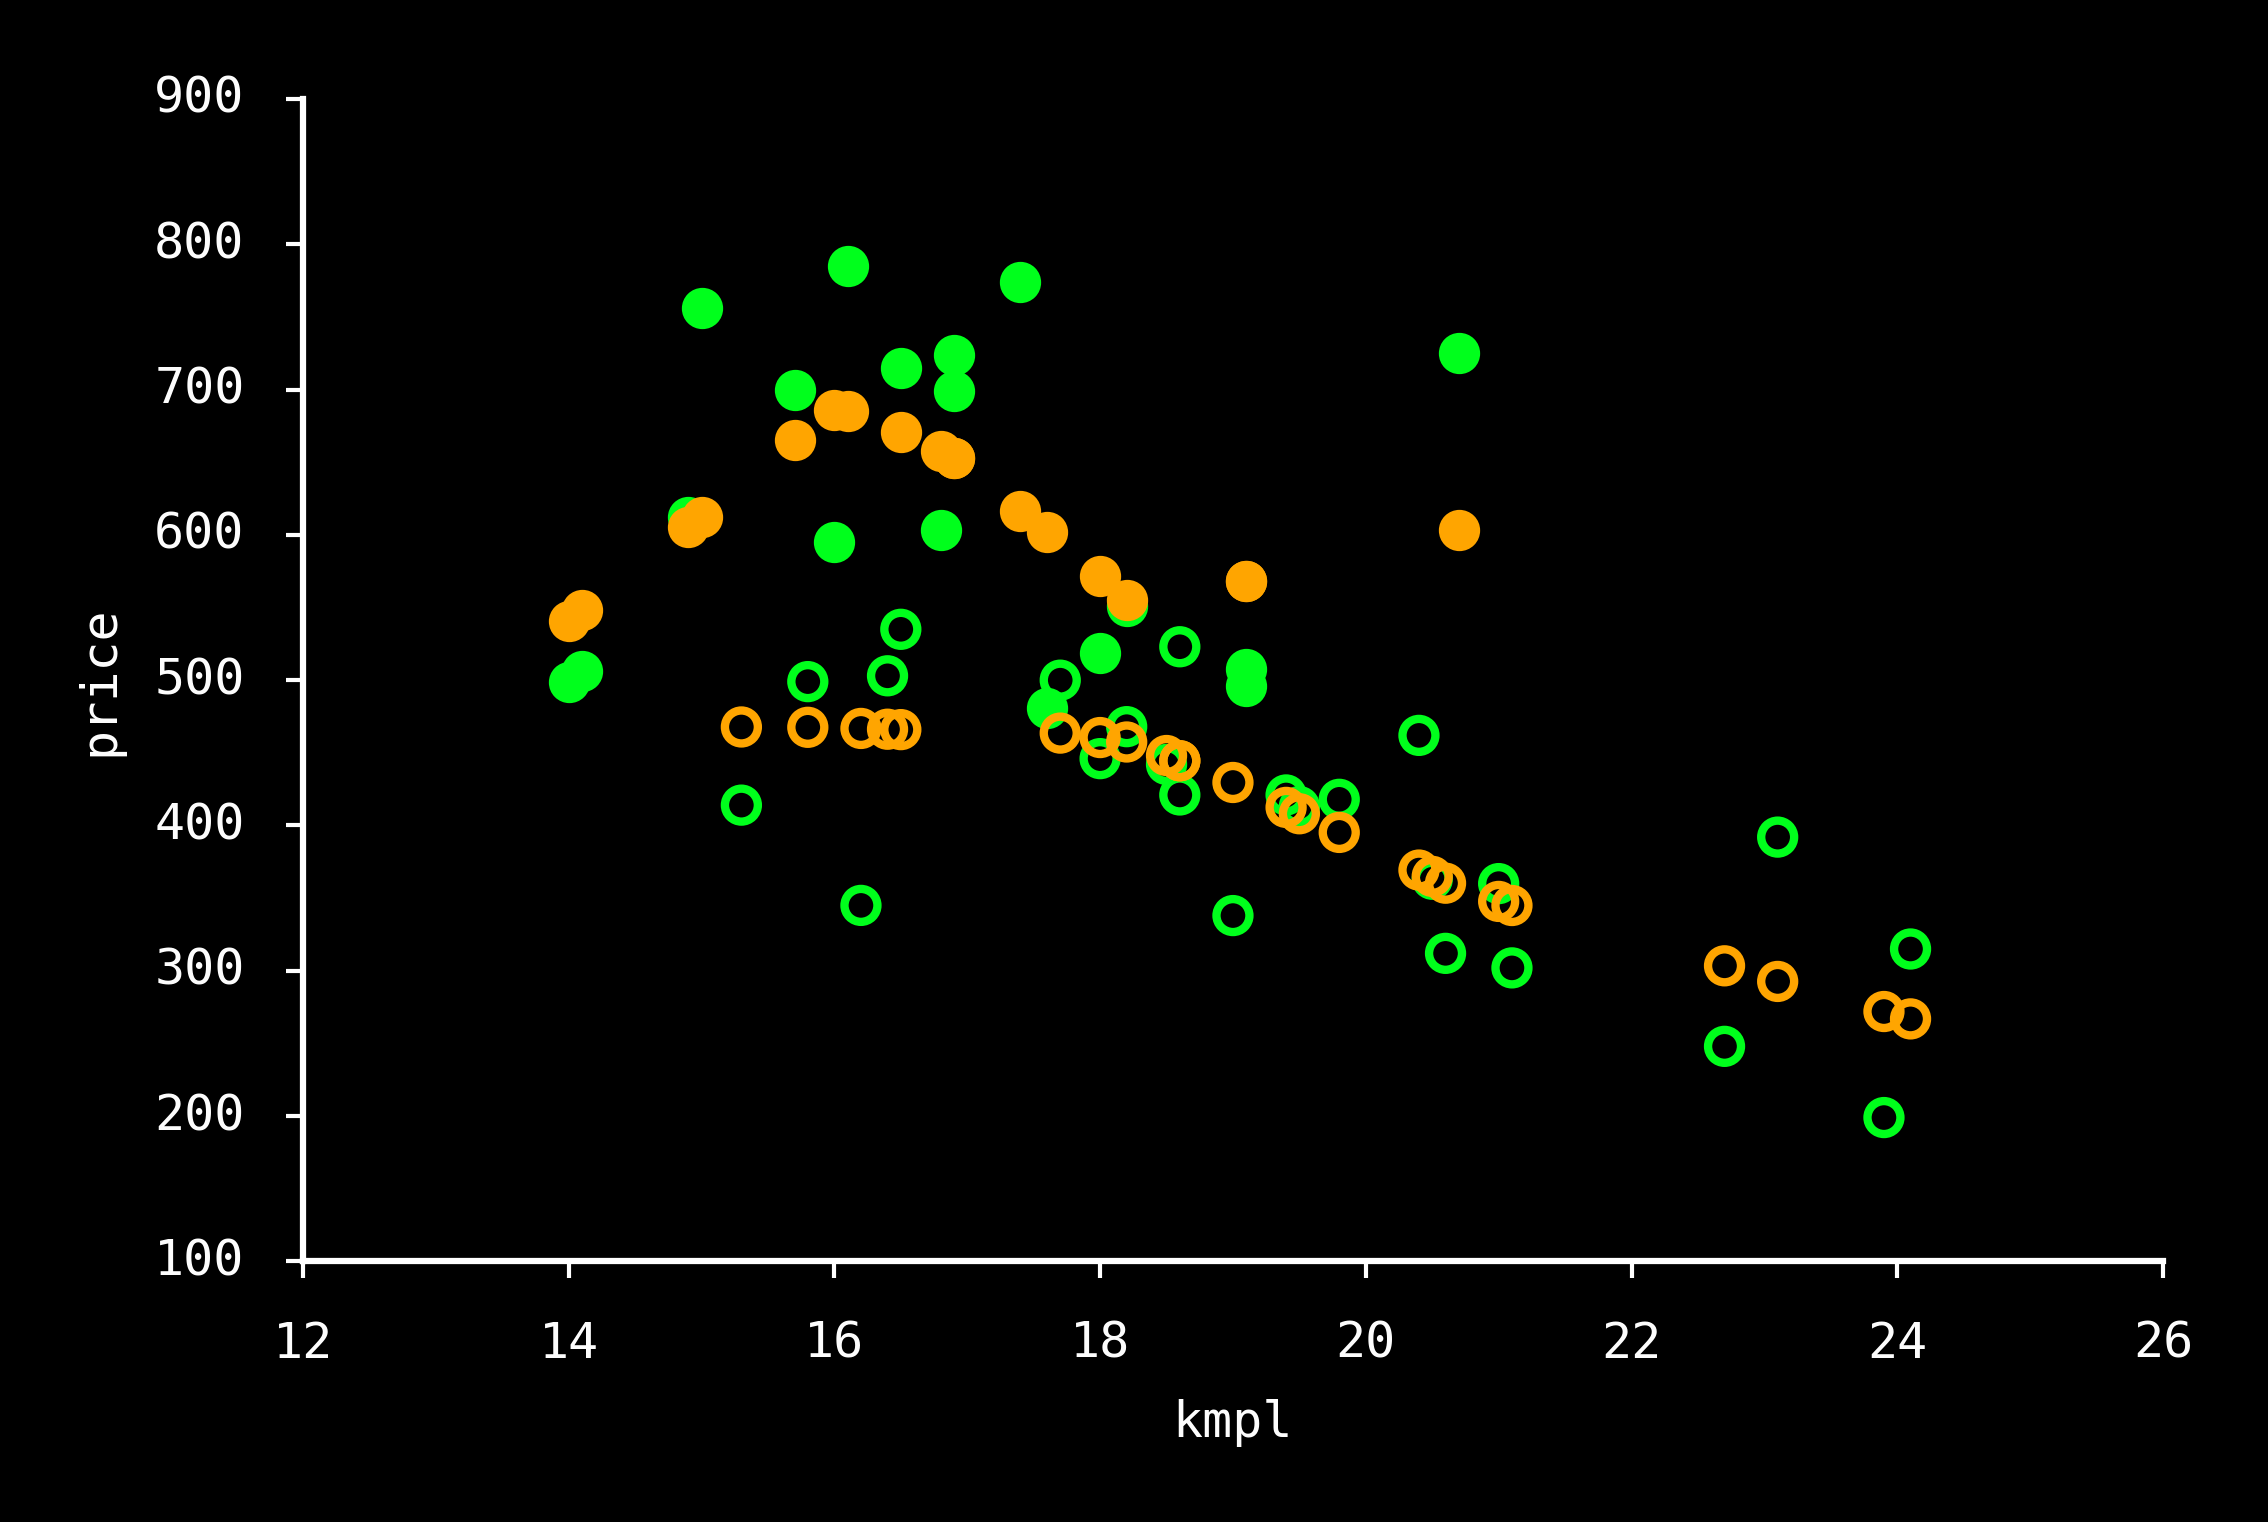

In [348]:
plt.scatter(kmpl0, price0, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(kmpl1, price1, s = 250, facecolor=green, edgecolor=green, linewidth=4)

plt.scatter(kmpl0, price_lowess_0, s = 250, facecolor="None", edgecolor=orange, linewidth=4)
plt.scatter(kmpl1, price_lowess_1, s = 250, facecolor=orange, edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')

plt.xlim(12,26)
plt.ylim(100,900)

hide_spines()
plt.savefig("figures/fig_cars_08b.png")

## Simple OLS 3 Feature Model

In [349]:
ols_3X = np.asmatrix(cars.loc[:,('kmpl','types')])
ols_3y = np.asmatrix(cars.loc[:,'price']).T
model_ols_3 = linear_model.LinearRegression().fit(ols_3X,ols_3y)
price_ols_3 = model_ols_3.predict(ols_3X)
beta_0_ols_3, beta_1_ols_3 = model_ols_3.intercept_, model_ols_3.coef_
print(beta_0_ols_3, beta_1_ols_3)

[ 763.23459374] [[ -18.66773553  175.89450997]]


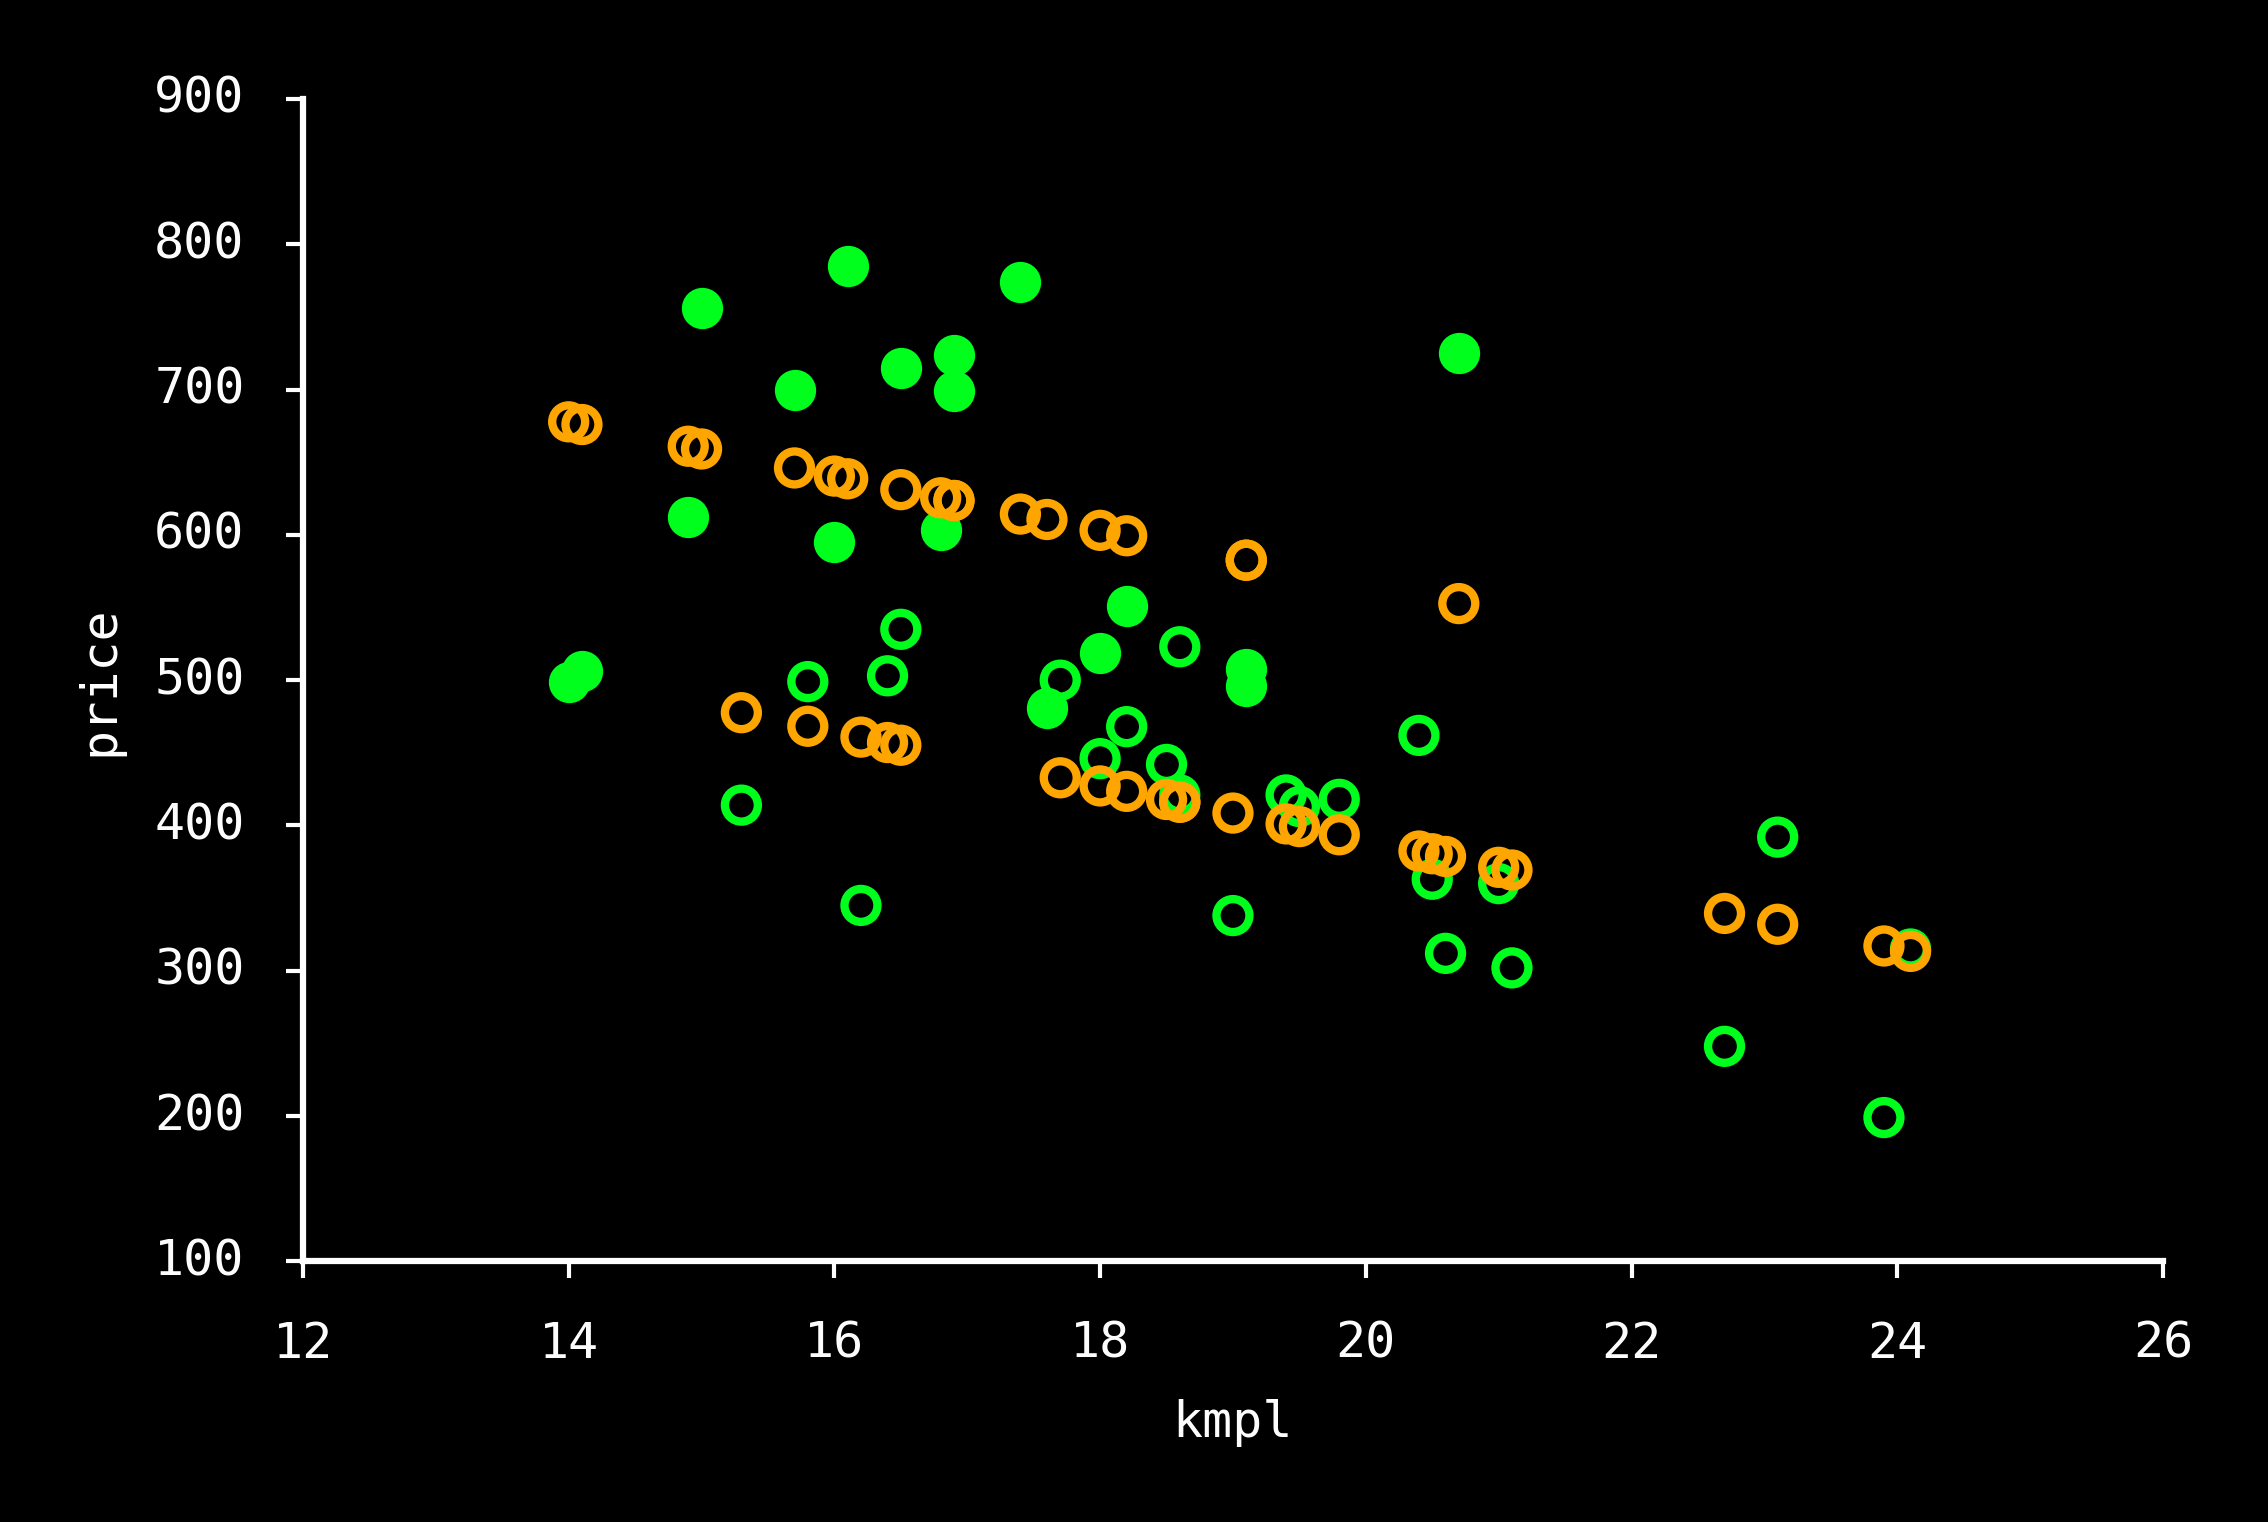

In [350]:
# Plot the data & model line
plt.scatter(cars0.kmpl, cars0.price, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(cars1.kmpl, cars1.price, s = 250, facecolor=green, edgecolor=green, linewidth=4)

#plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(kmpl, price_ols_3, s = 250, facecolor="None", edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_08a.png")

# [5] Process of Model Fitting

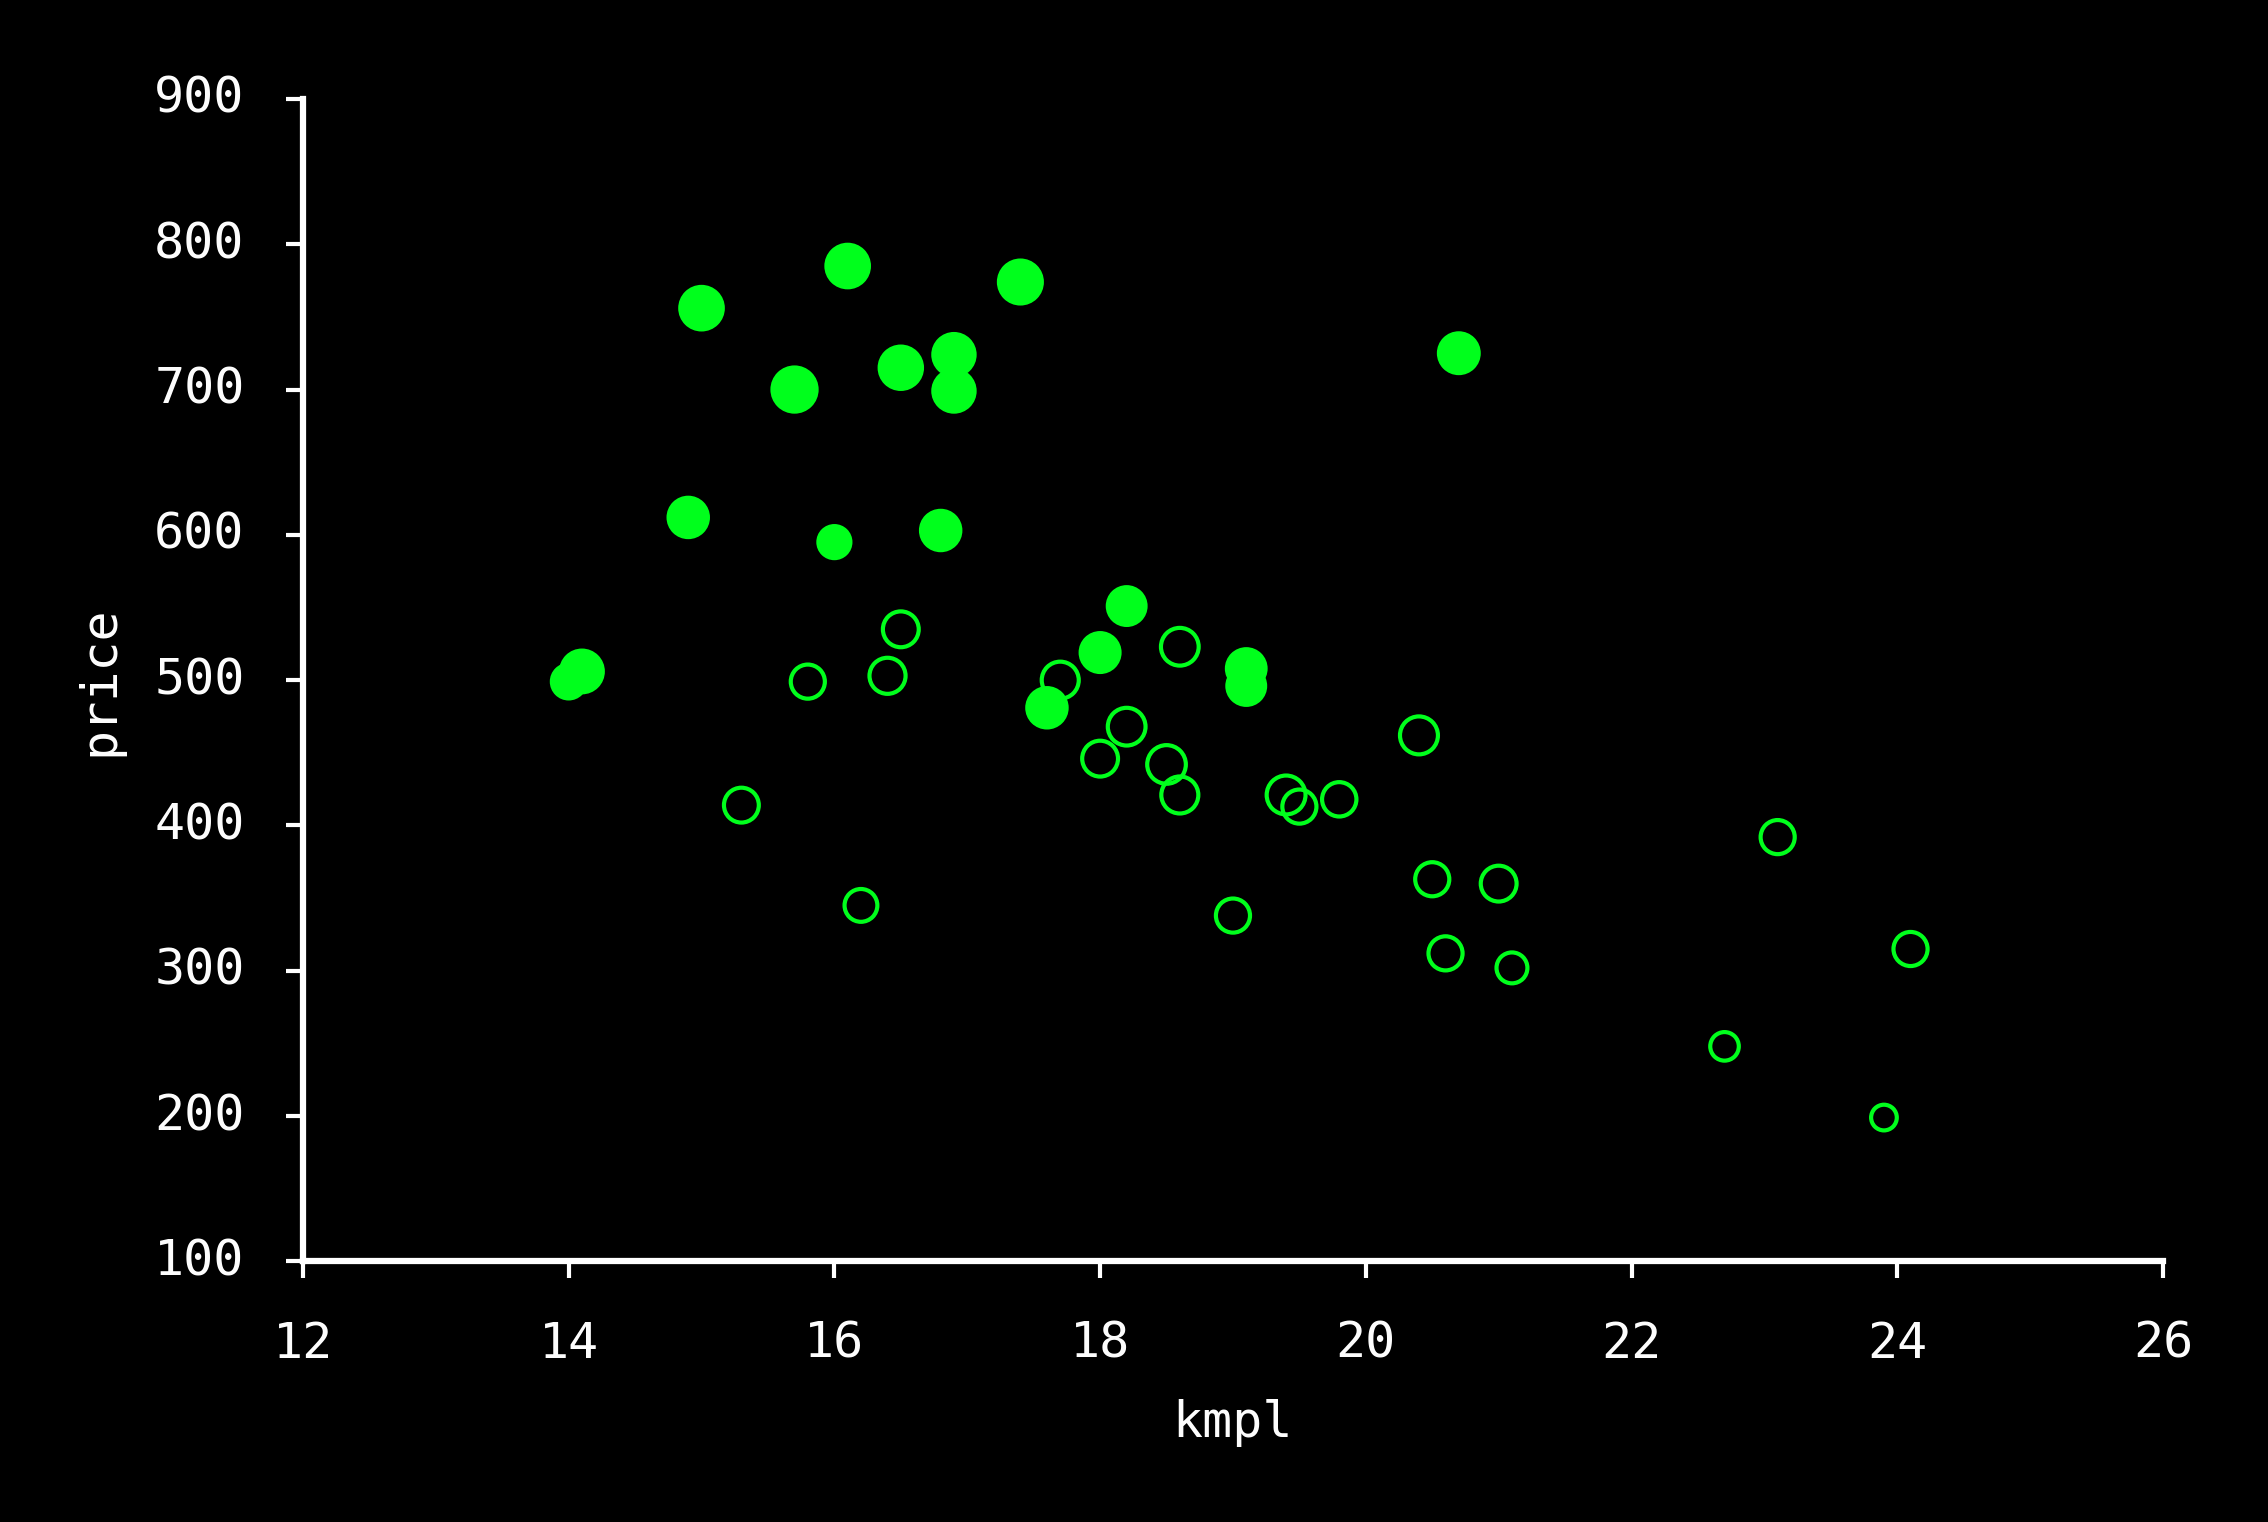

In [351]:
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)
plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_09.png")

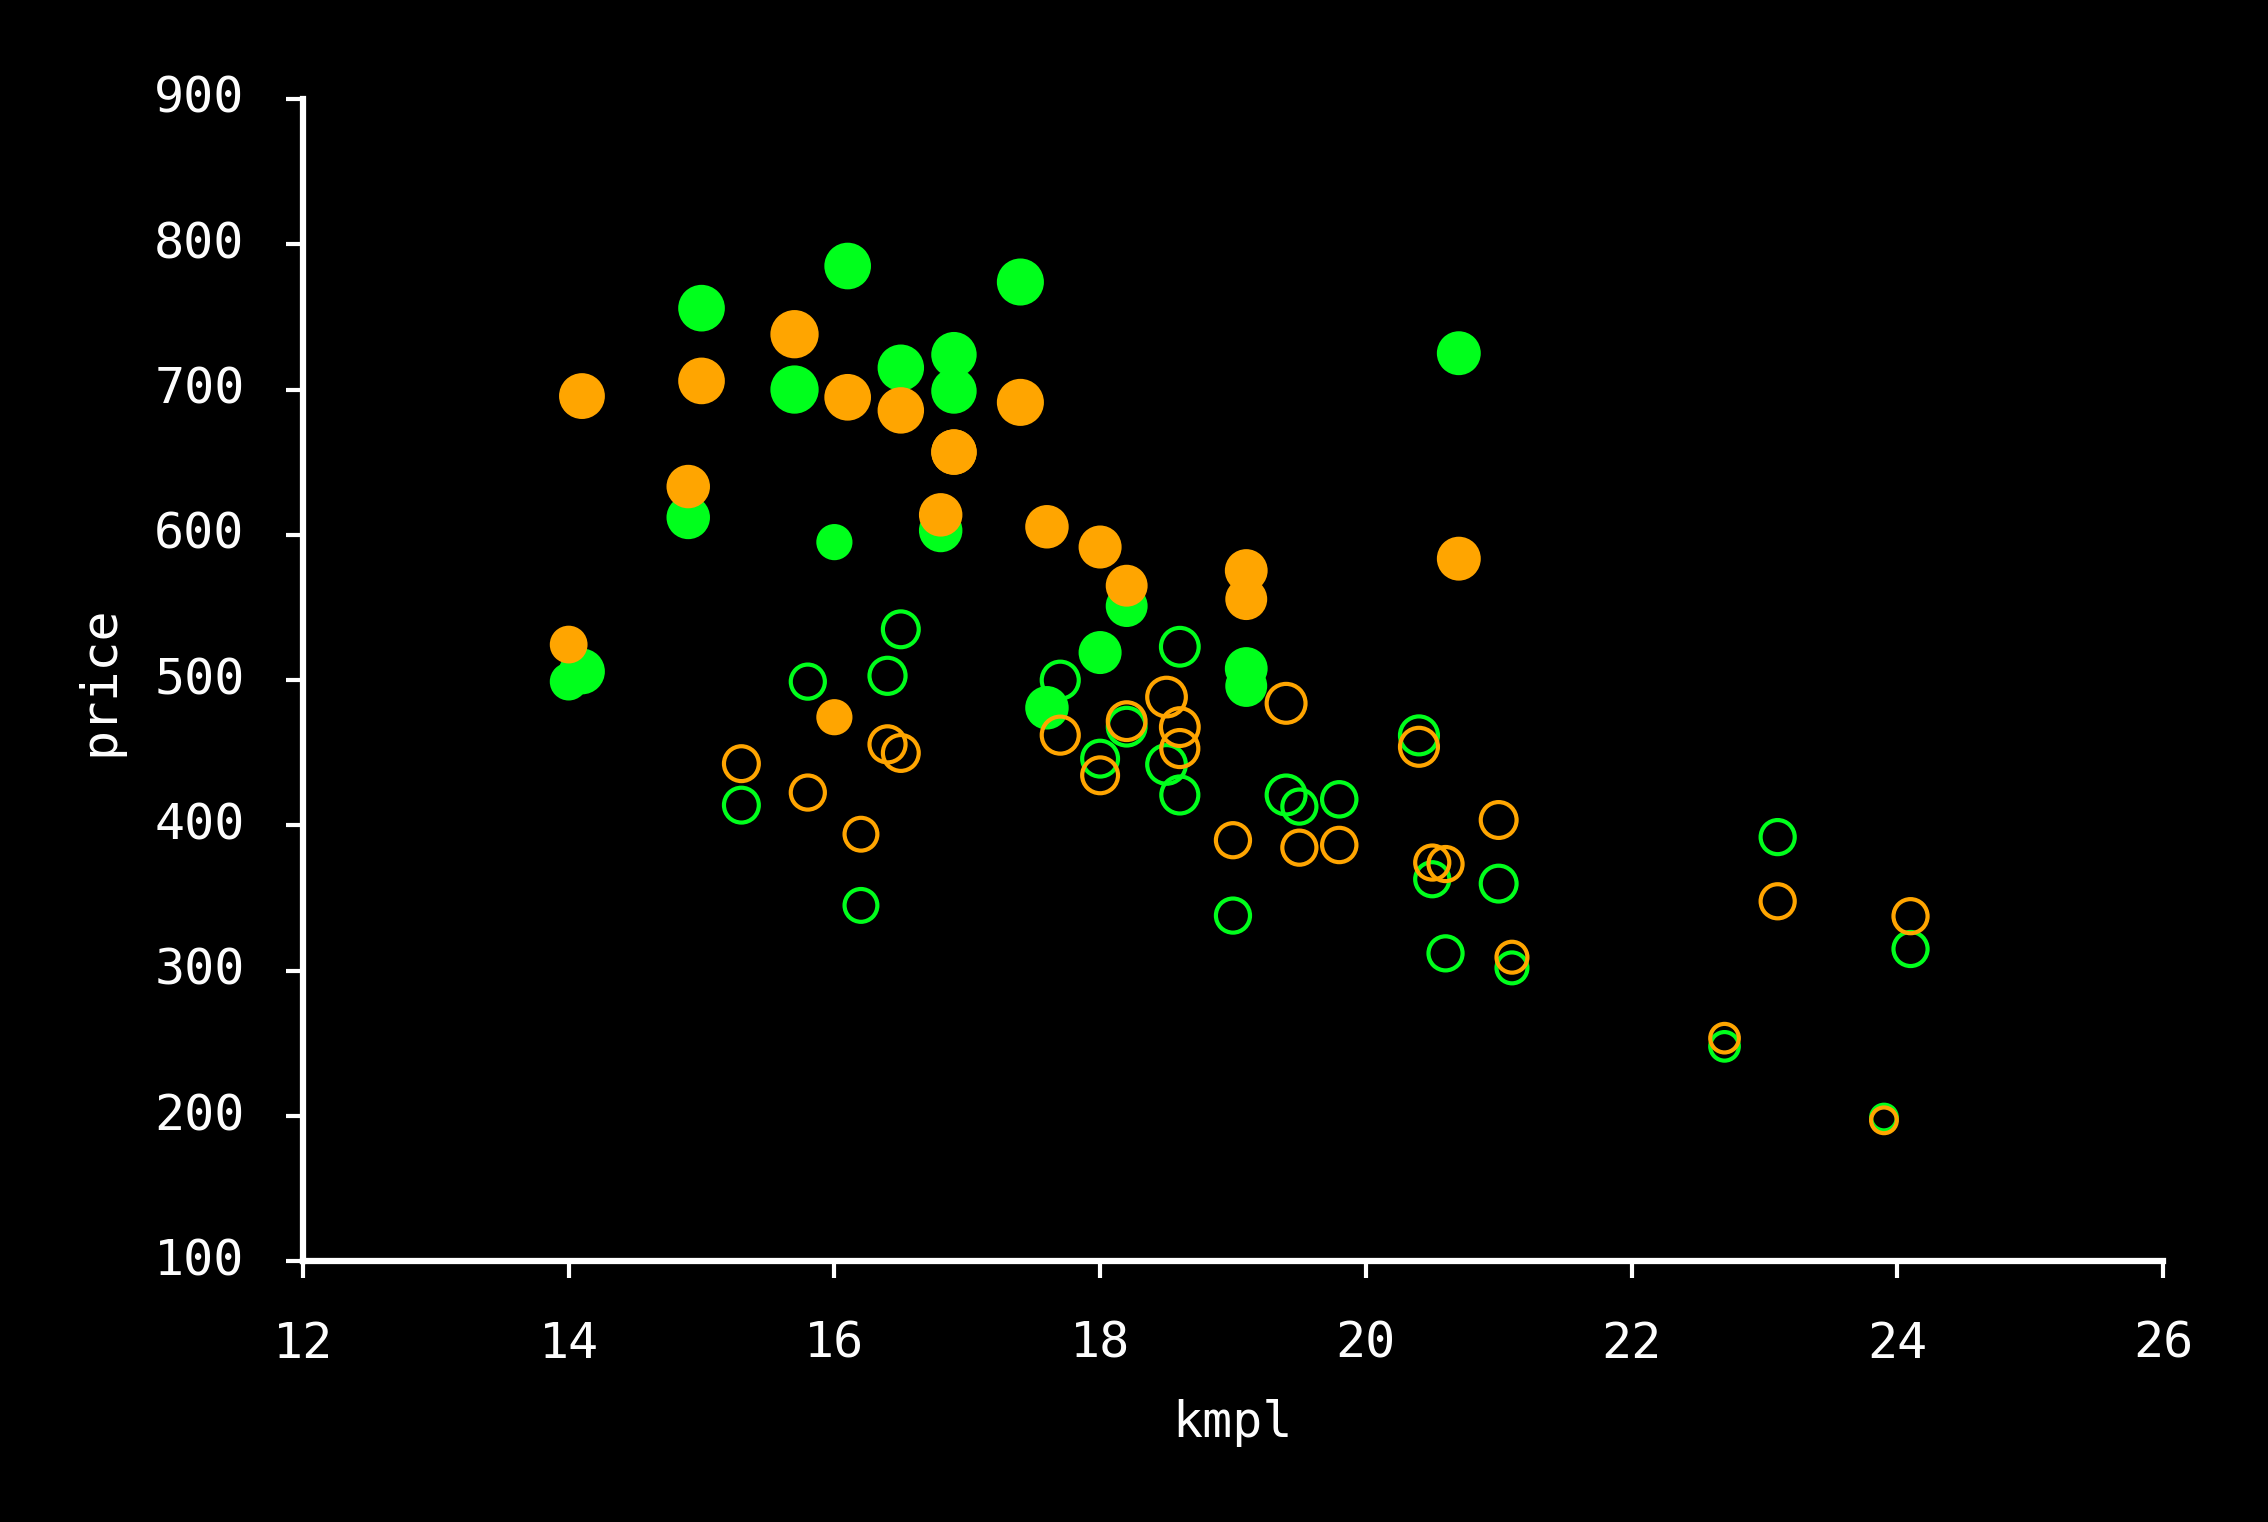

In [352]:
# Plot the data & model line
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_10.png")

## Visualise Model Errors
### OLS (4 feature)

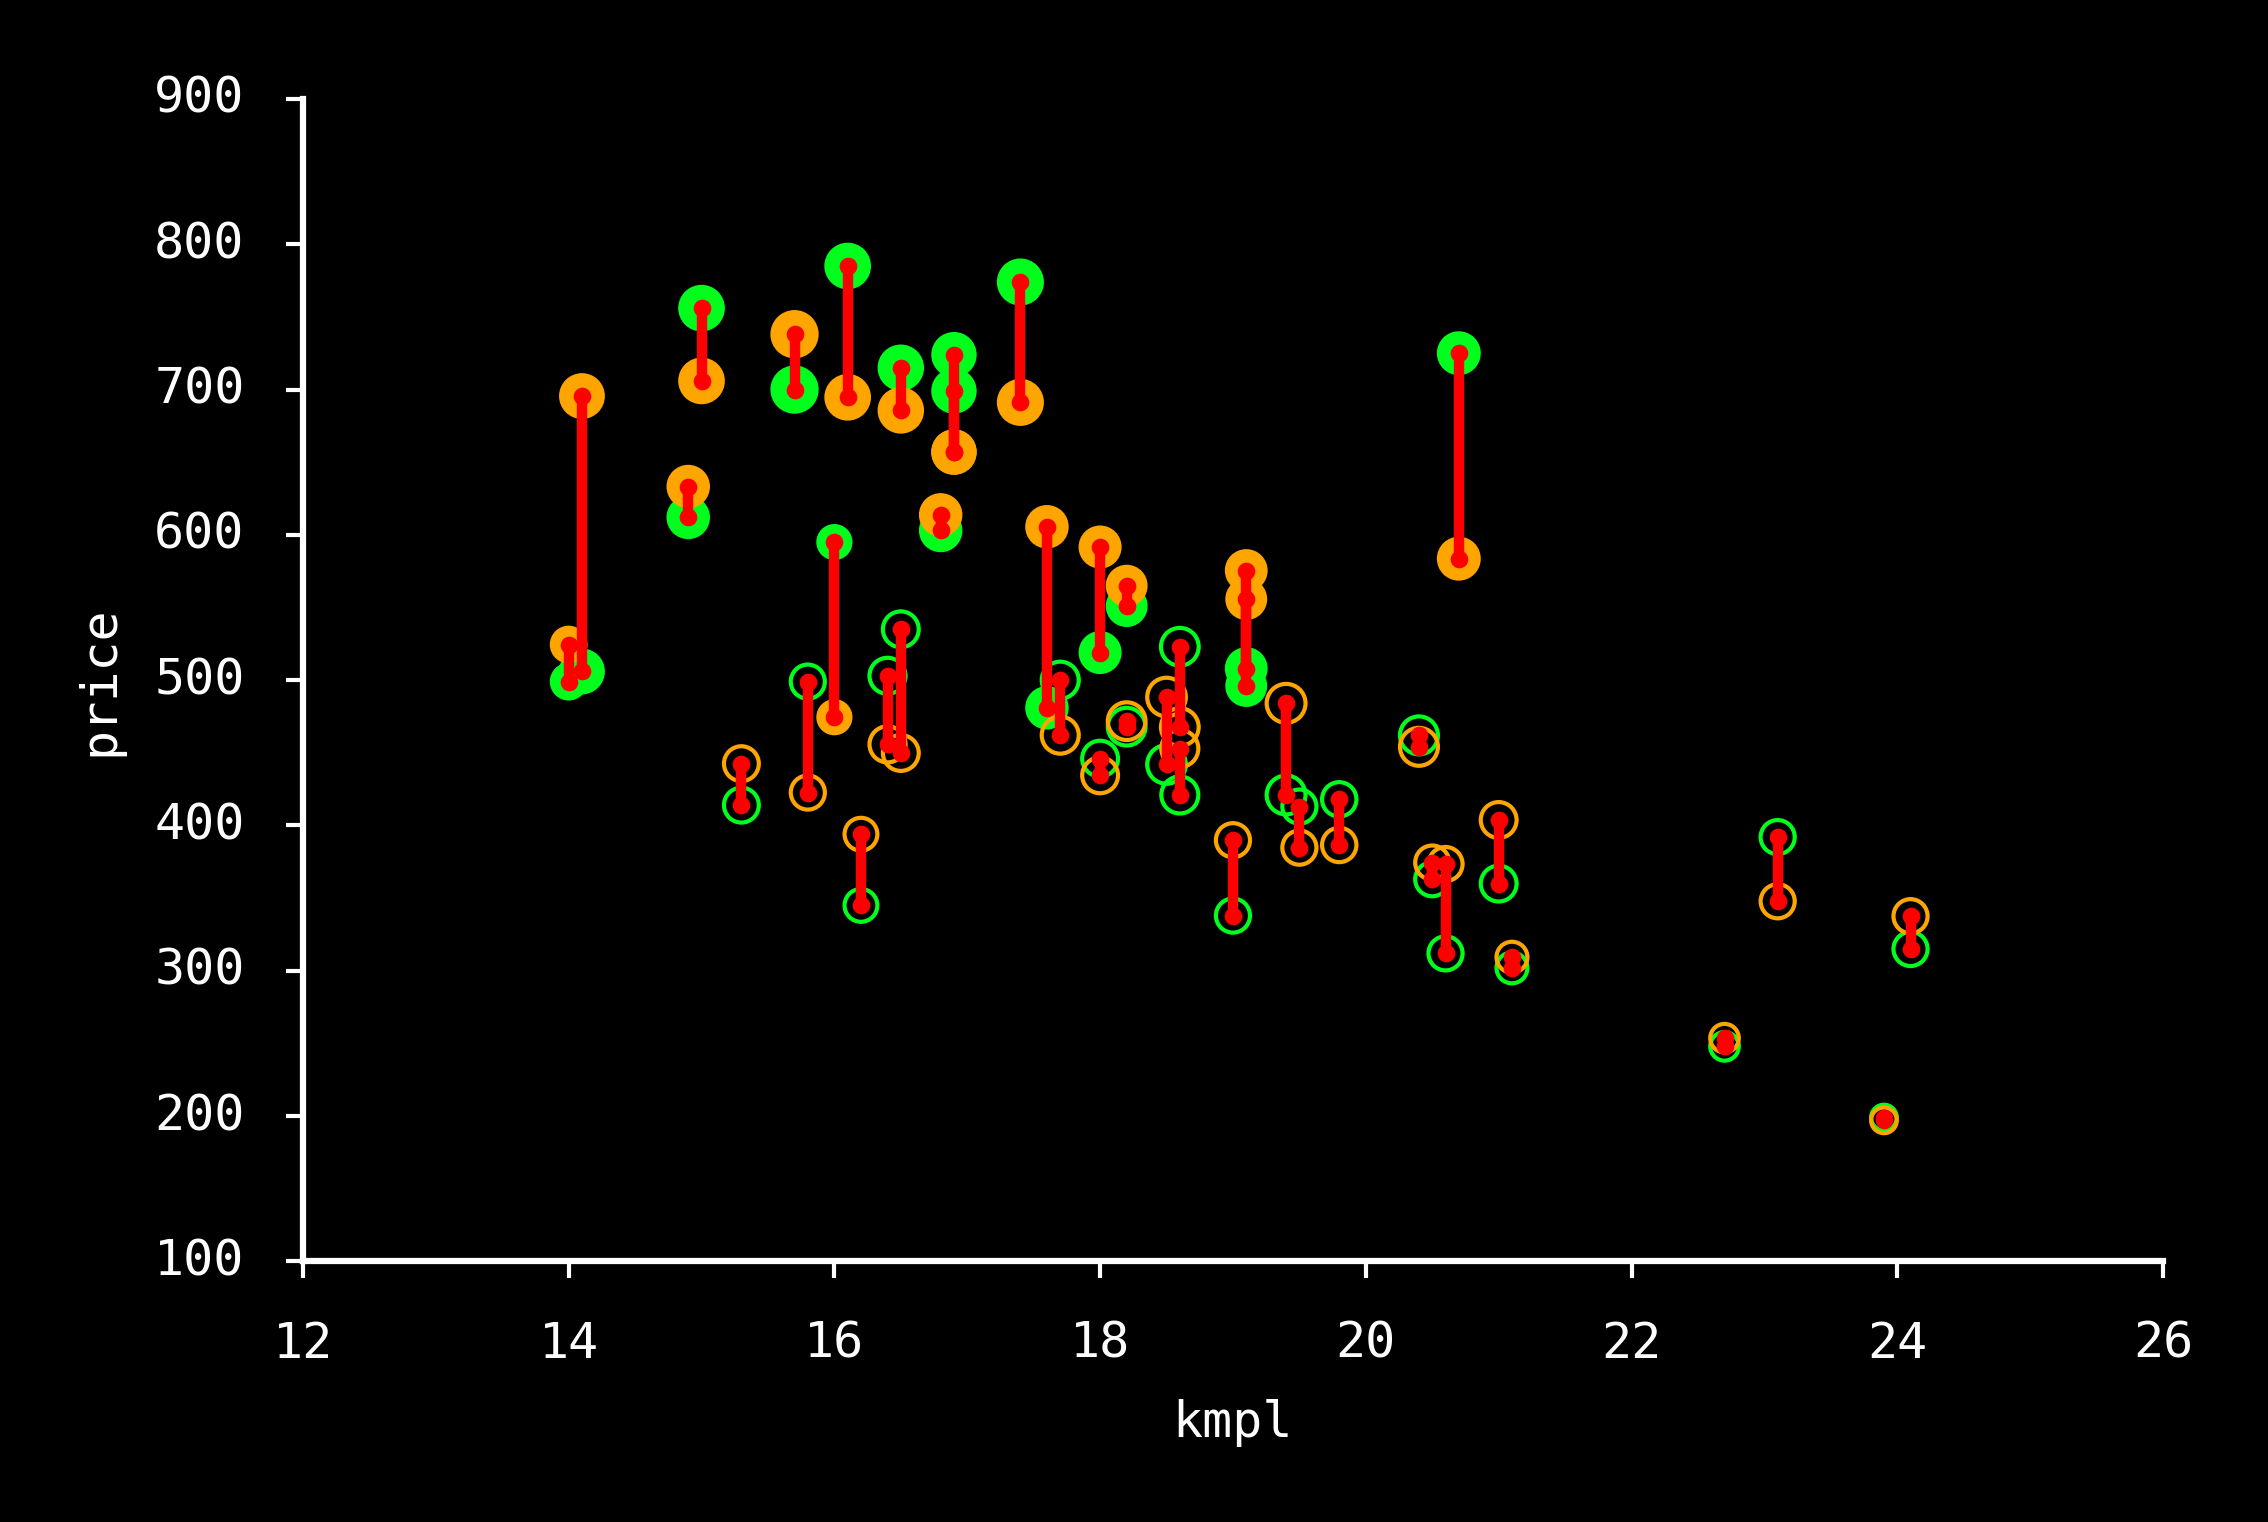

In [353]:
# Plot the errors
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.scatter(kmpl, price, s = 20, facecolor=red, edgecolor=red, linewidth=4)
plt.scatter(kmpl, price_ols_4, s = 20, facecolor=red, edgecolor=red, linewidth=4)

ols_errL = cars.price_ols_4 - cars.price
ols_errB = cars.price_ols_4 - cars.price_ols_4
plt.errorbar(kmpl, price_ols_4, fmt = 'none', yerr=[ols_errL, ols_errB], ecolor=red, elinewidth = 5)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_11.png")

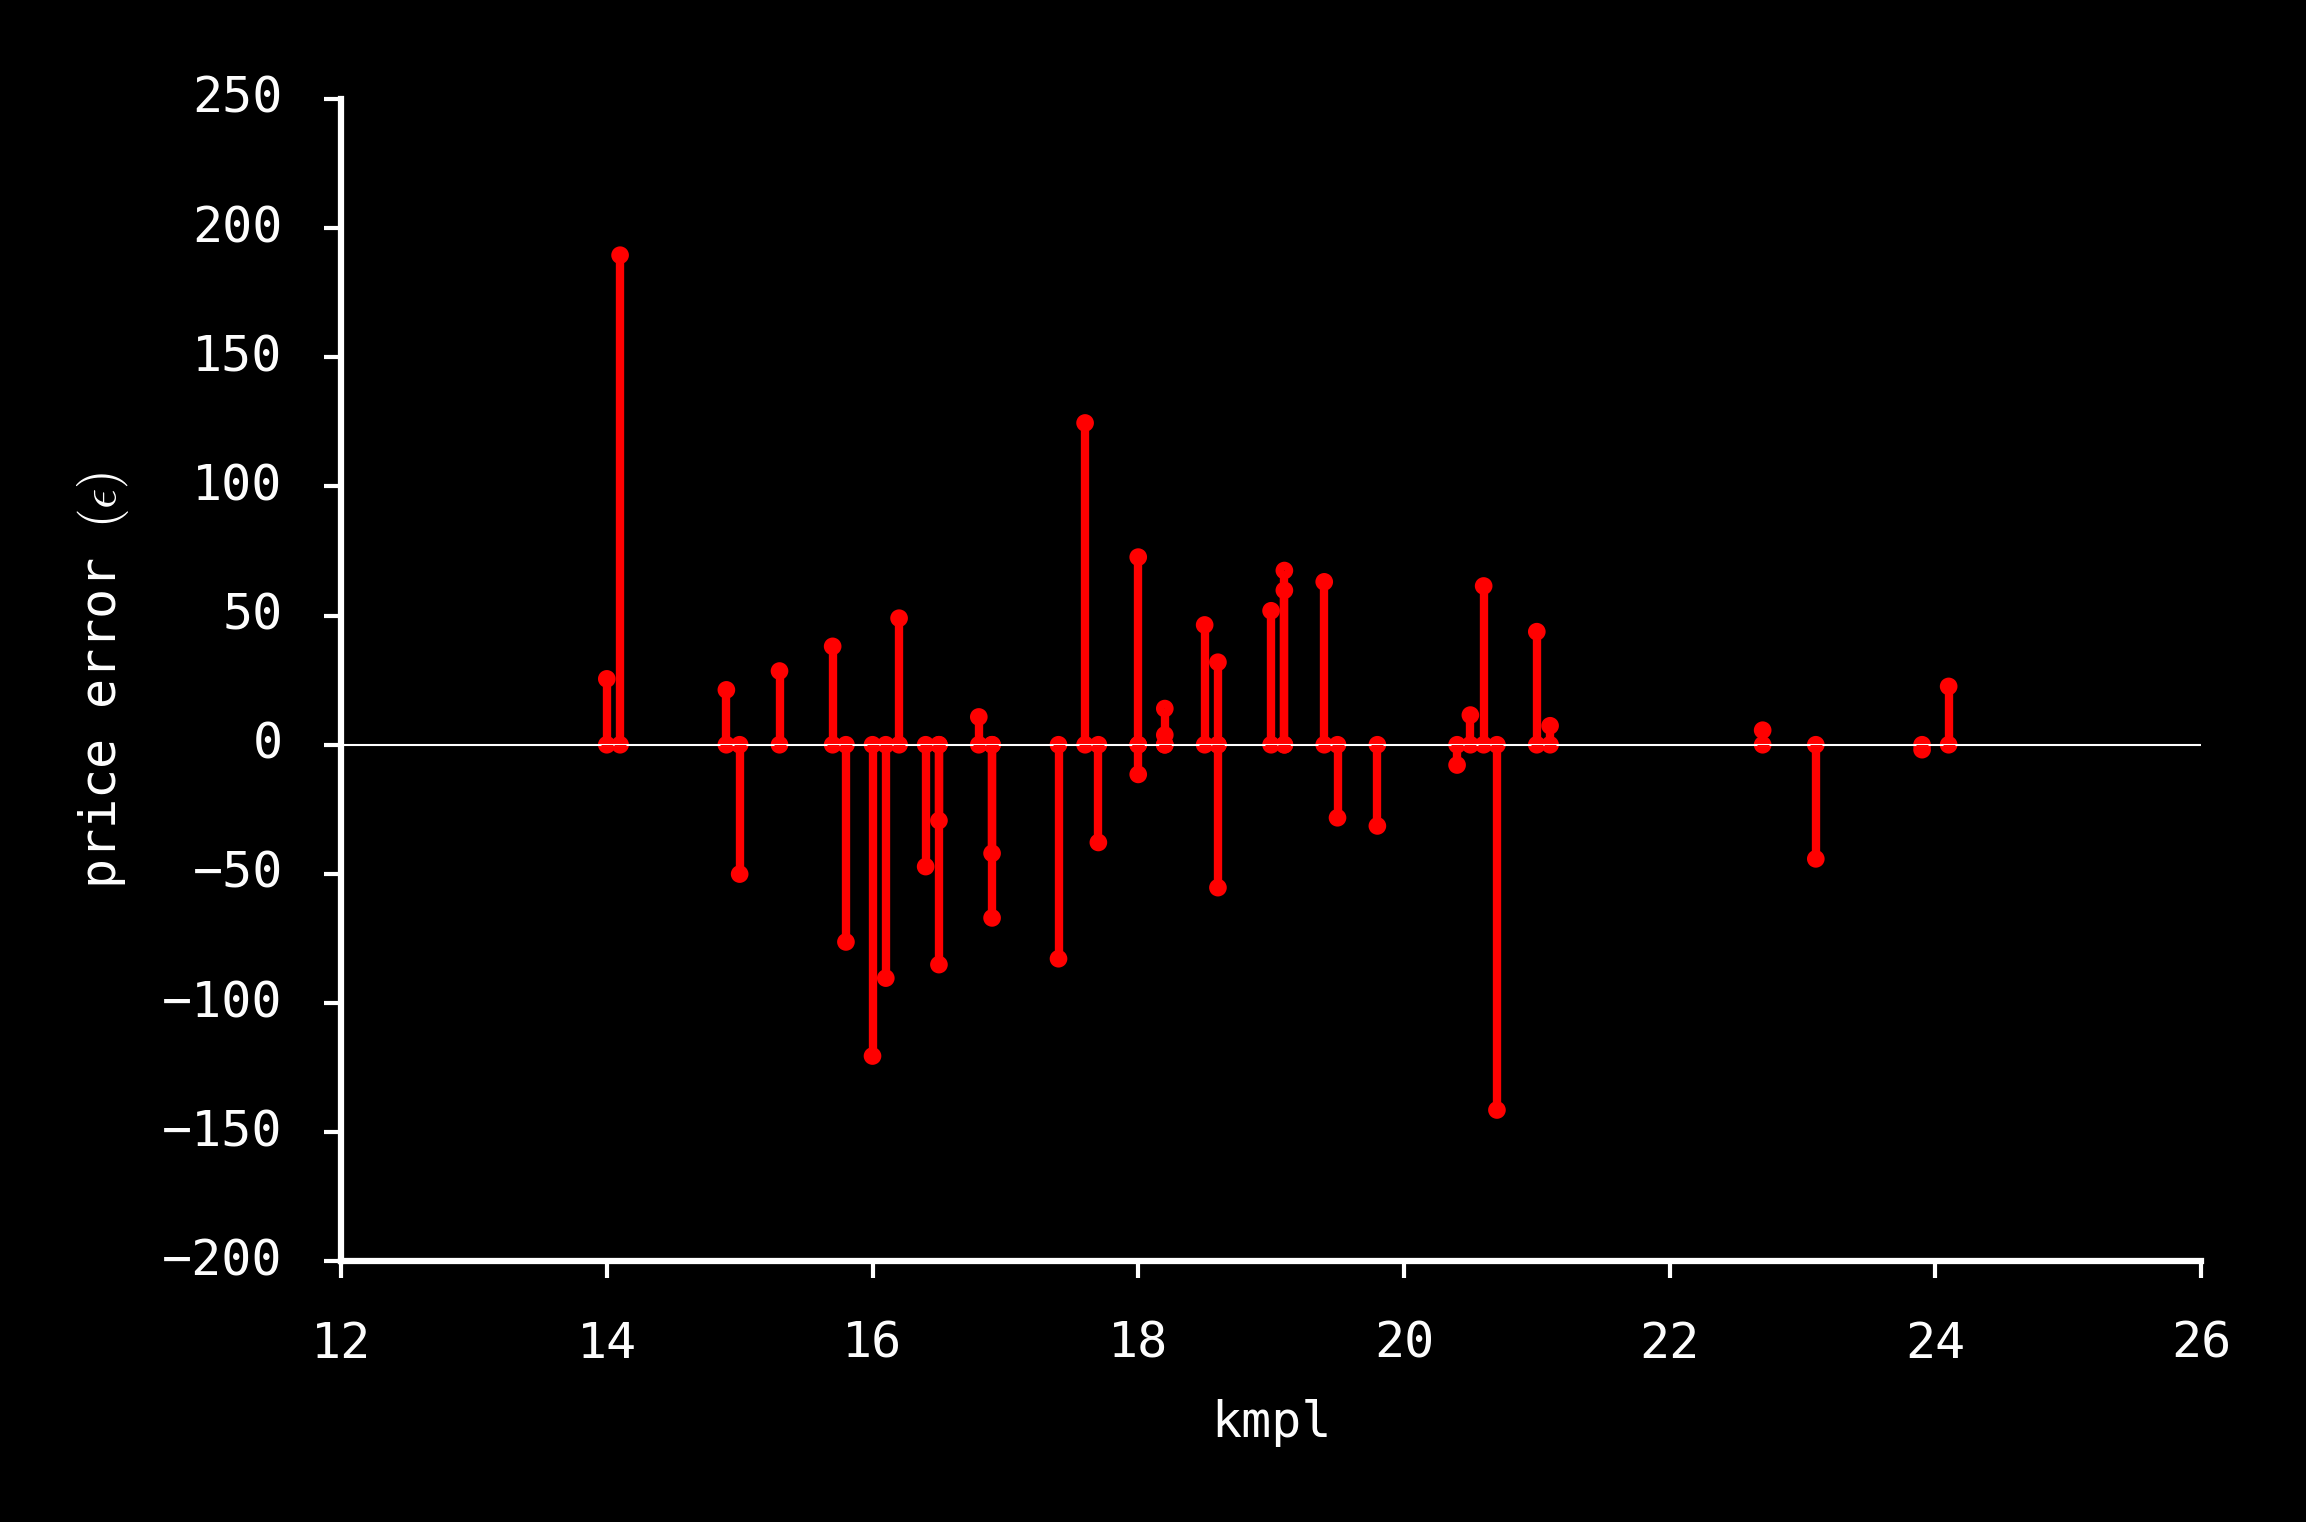

In [354]:
# Plot the errors 
plt.scatter(kmpl, ols_errL, s = 20, facecolor="None", edgecolor=red, linewidth=4)
plt.scatter(kmpl, ols_errB, s = 20, facecolor="None", edgecolor=red, linewidth=4)

plt.axhline(0, color='w', linewidth=1)

plt.errorbar(kmpl, ols_errL, fmt = "none", yerr=[ols_errL, ols_errB], ecolor=red, elinewidth = 4)

plt.xlabel('kmpl')
plt.ylabel(r'price error $(\epsilon)$')
hide_spines()
plt.savefig("figures/fig_cars_12.png")

## Final Model - Cross Validation

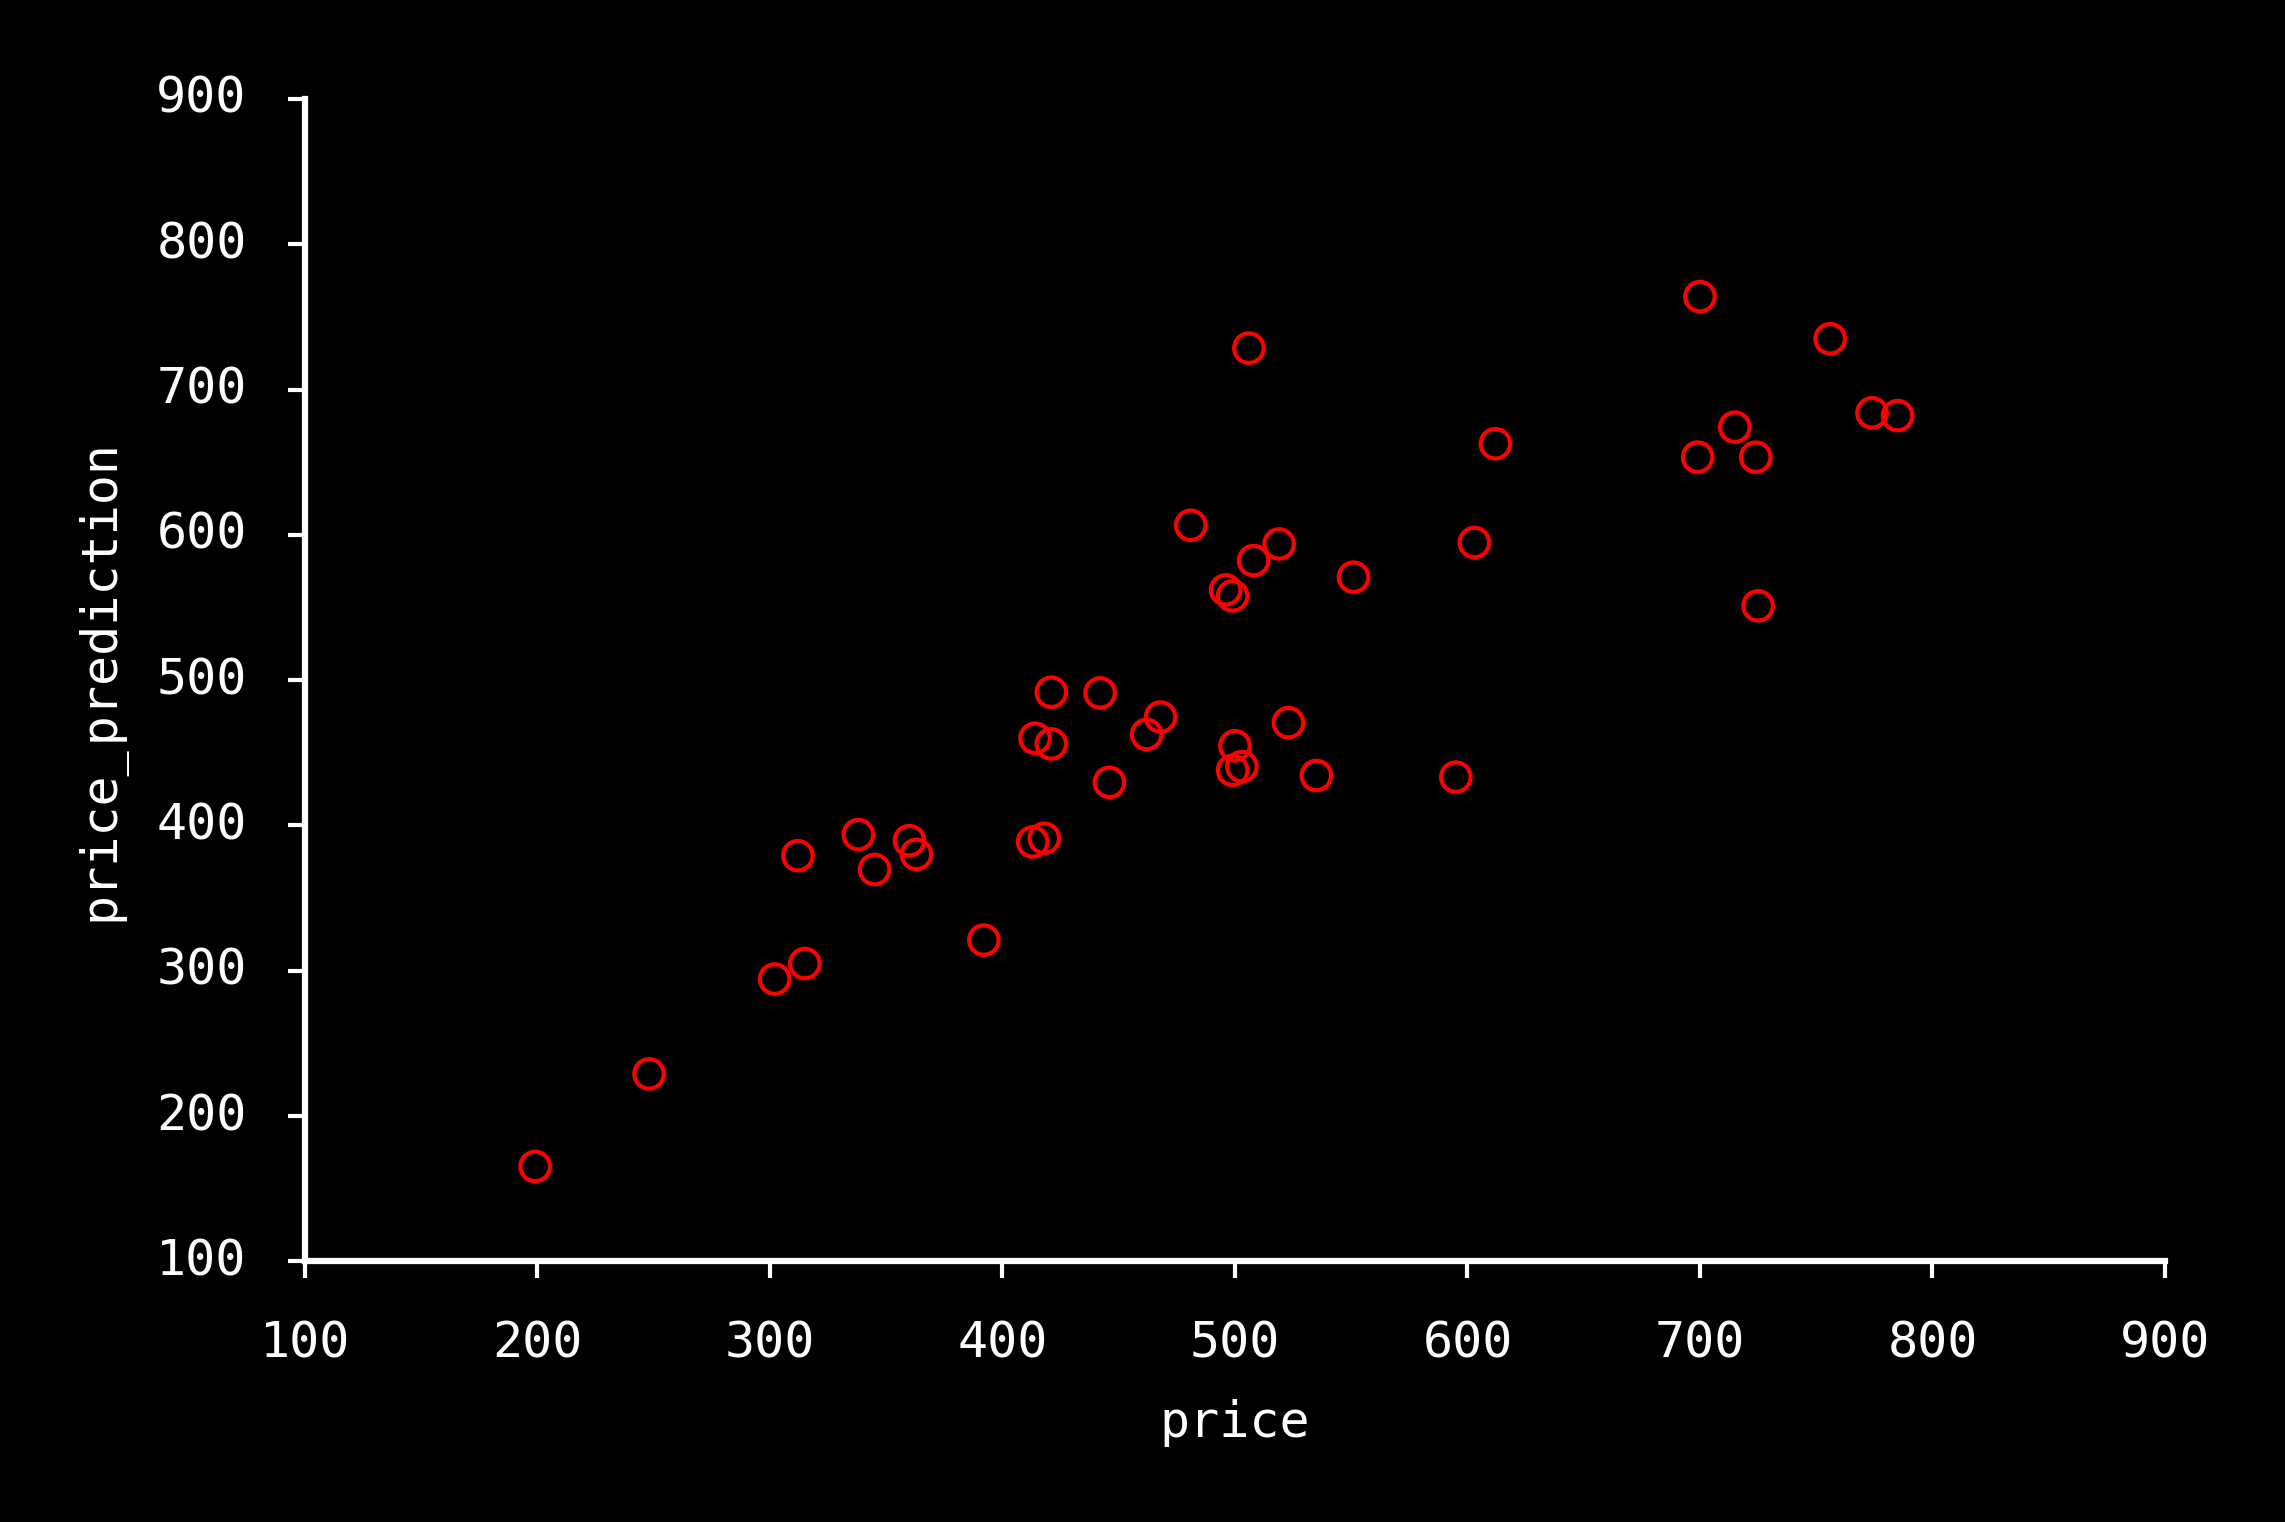

In [369]:
plt.scatter(price, price_ols_4_val, s = 200, facecolor="None", edgecolor='r', linewidth=2)

plt.xlabel('price')
plt.ylabel('price_prediction')

plt.xlim(100,900)
plt.ylim(100,900)

hide_spines()
plt.savefig("figures/fig_cars_13.png")

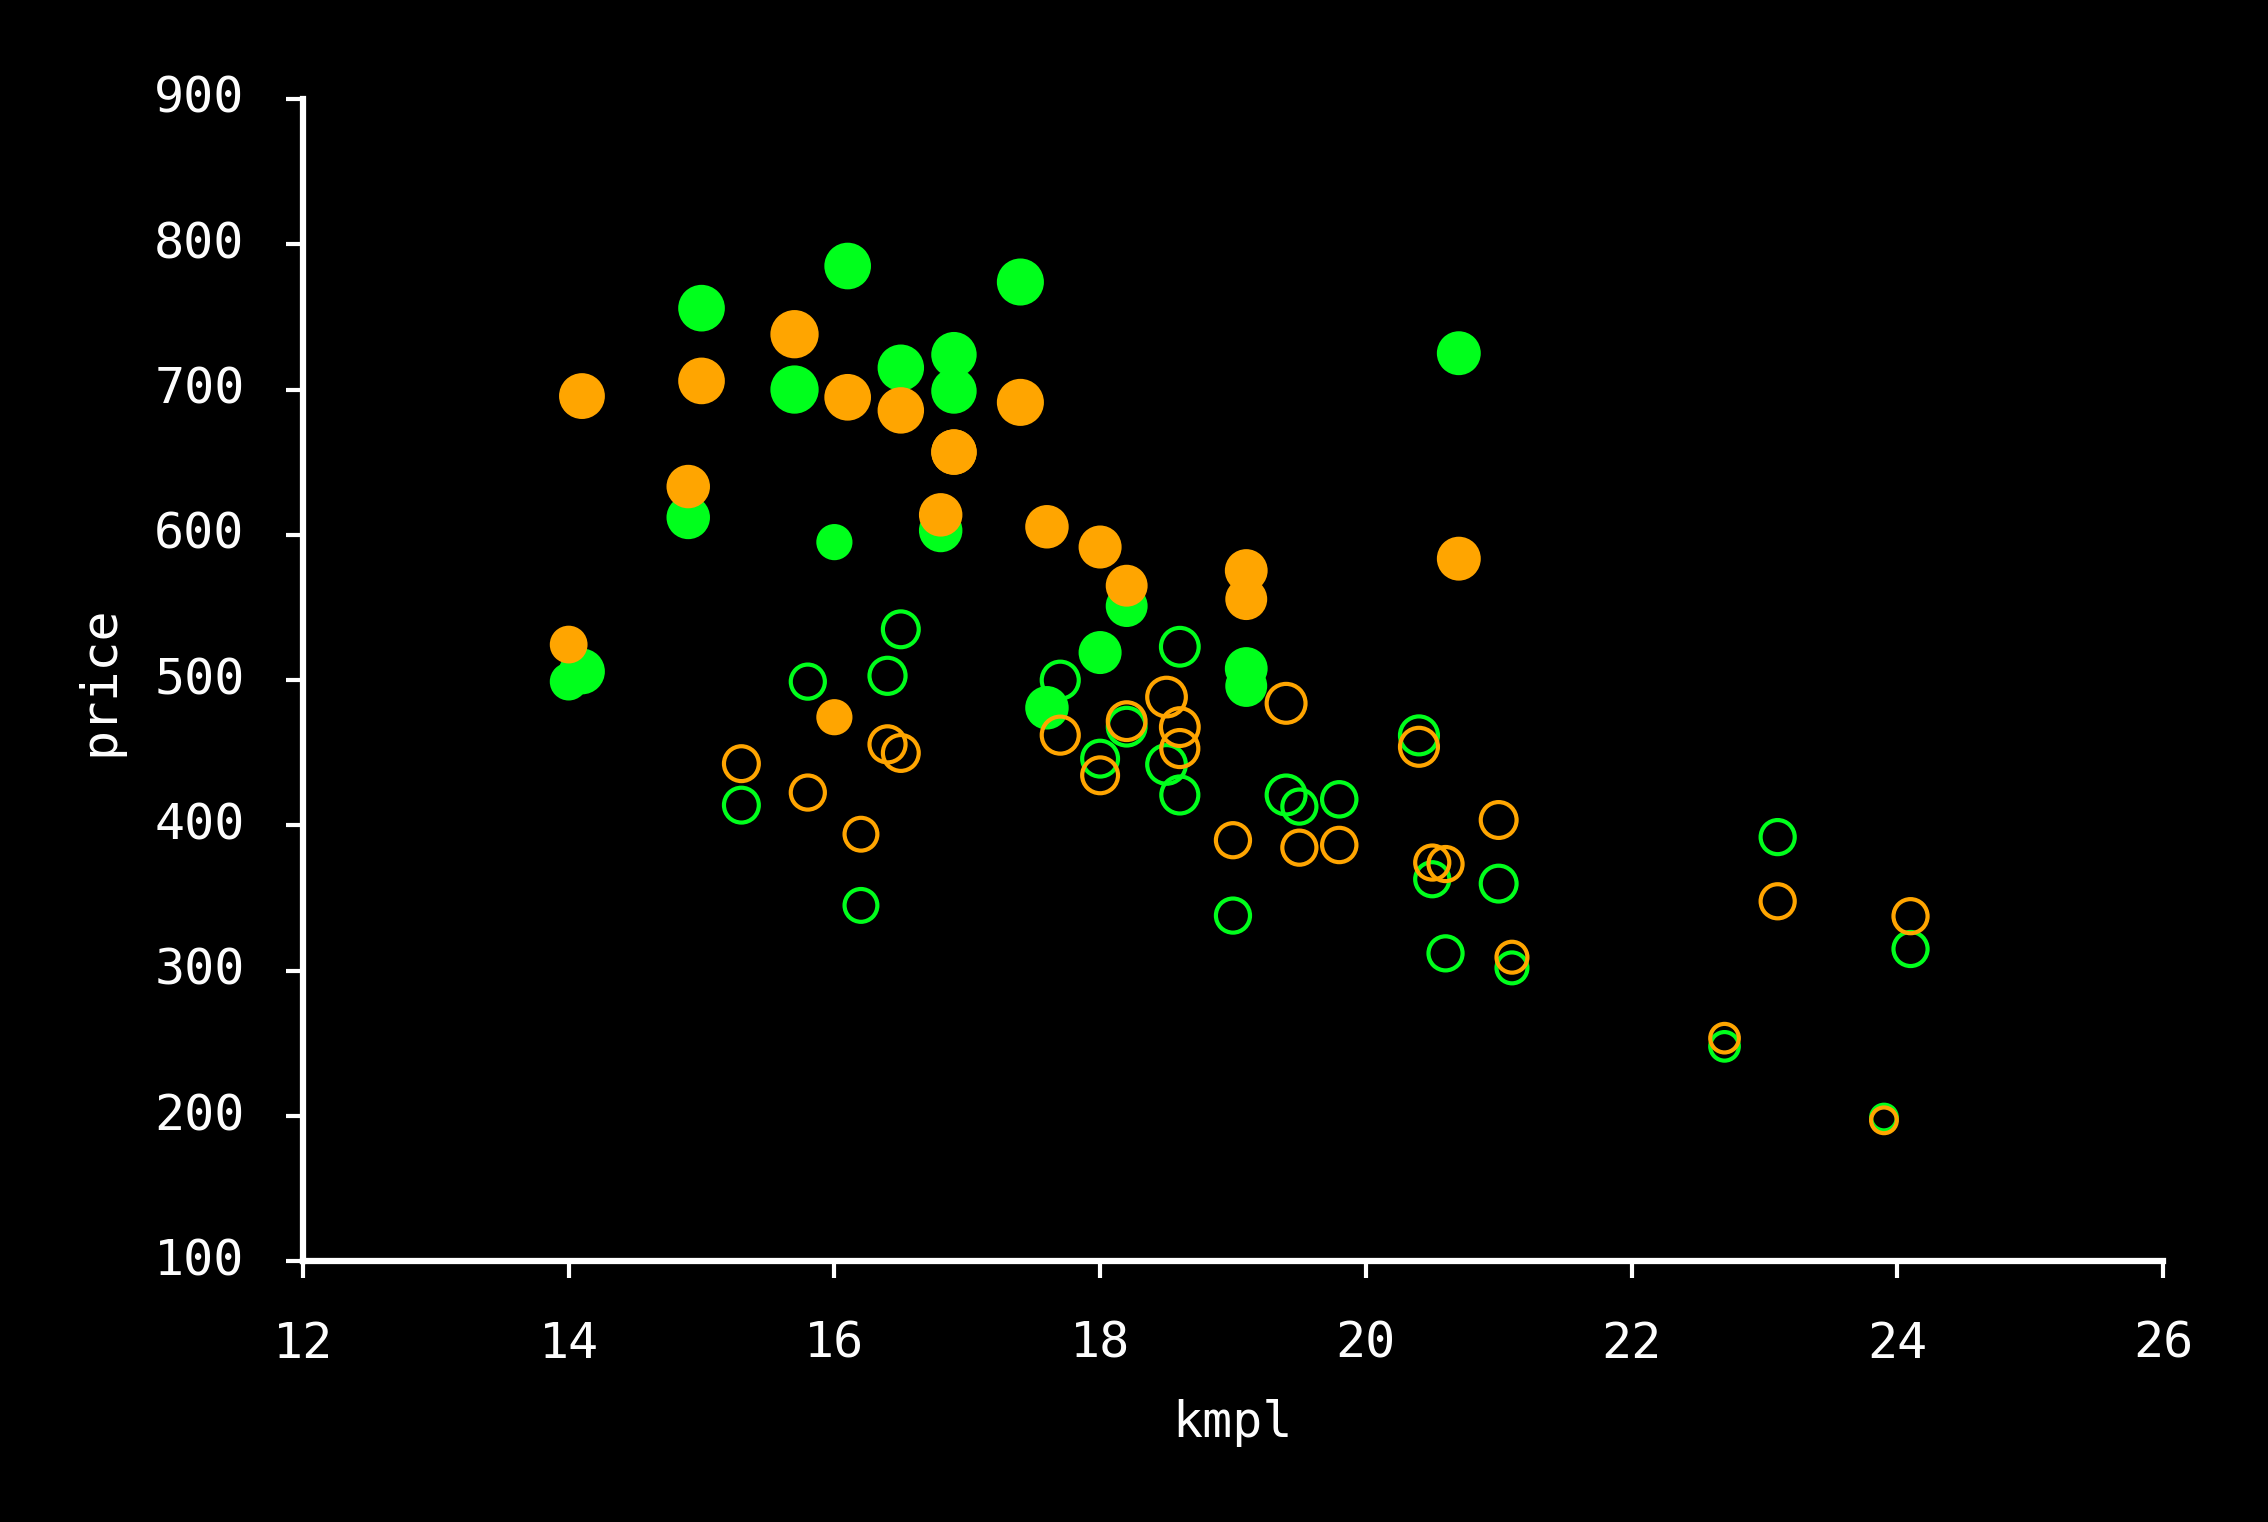

In [380]:
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4_val, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4_val, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_14.png")